-----
## Práctico Análisis y Visualización

El siguiente trabajo esta pensado para ser entregado en formato de tipo informe en un notebook Python hecho en Jupyter Lab o Google Colab. Debera apuntar a un público técnico con conocimientos generales del tema. 

La presentación de los resultados debe ser clara, apoyar las conclusiones extraidas y ser lo mas sintetico posible. No necesariamente todo lo que prueben debe estar reflejado en el informe. Ciertamente valoramos el esfuerzo de explorar alternativas de análisis y visualización, pero parte del trabajo es elegir también las mas adecuadas. 

----

## Consignas

### 1. Armado del dataset

Inicialmente nuestro conjunto de datos se encuentra distribuido en varios archivos. Es necesario juntar todo en un mismo set de datos para facilitar la manipulacion. 

- Describir las caracteristicas generales de los datasets presentes en los archivos de entrada: Numero de registros, diferencias entre los mismos. 
- Definir conveniencia de usar todos los datos juntos en un mismo dataset o separarlos. 

### 2. Exploración

- De que consta nuestro dataset? que tipo de datos tenemos?
- Nuestra variable a predecir, esta balanceada dentro del dataset etiquetado?
- Que tipo de curacion creen que seria necesaria realizar? Existen datos nulos?
- En base a lo que podemos entender conceptualmente sobre nuestras variables, existe alguna que a priori pueda tener una mayor influencia sobre nuestro objetivo a predecir? por qué?
- Existe correlacion entre las variables del dataset? Cual metodo de cálculo de correlacion conviene usar para este tipo de variables?

### 3. Visualización

- Como se distribuyen las variables? Cuales siguen una distribucion normal y cuales no?
- Explorar las diferencias entre las distribuciones de las distintas variables: 
  - según el paciente
  - según la etiqueta a predecir
  - ambas (usar hue)
- Hay outliers presentes en nuestras distribuciones? habria que sacarlos?

### **Sobre los datos no etiquetados**

Si bien todavia no vamos a predecir una etiqueta, nos interesa entender lo mas posible sobre estos datos para poder entender las predicciones de los modelos.

- Visualizar las distribuciones de las distintas metricas. Se comportan parecido a los etiquetados si eliminaramos las etiquetas? y si las consideramos?

### 4. Conclusiones

Sobre los datos etiquetados: 
- En base al análisis, se pudo encontrar cual(es) son las métricas que mejor diferencian un estado de otro?

Sobre los no etiquetados:
- Conviene analizarlos junto con los que si estan etiquetados? 

### 5. Opcional: Analizar las señales originales y obtener un nuevo cuantificador.

- Para las señales de EEG de un paciente , acceder a cada uno de los datos de EEG

Para cada archivo: 

- Preprocesar las señales (aplicar filtro de pasa banda ) pertenecientes a los 16 canales 
- Analizar la entropía espectral de cada una de las señales y calcular el valor medio sobre todos los canales.
- Almacenar los datos en un Data Frame  

*la entropía espectral se calcula usando el paquete  [antropy](https://github.com/raphaelvallat/antropy) (se instala con $ pip instal antropy). 

El comando es antropy.spectral_entropy(señal, sf=400, method='welch', normalize=True))   (señal es la señal de EEG , los otros parametros quedan fijos)

----------------------------------------------------
### 1. Armado del dataset

Recordemos los significados de cada una de las métricas calculadas:

*  PE: Entropía de permutación 
*  SC: Complejidad Estadistica 
*  GNE: Entropia Globlal de Redes 
*  LZC: Complejidad de Lempel Ziv 
*  STE: Entropía Tsallis 
*  Mean: Valor medio 
*  Std: Desvio estandar  
*  Skew: Oblicuidad  
*  SE: Entropía espectral


In [ ]:
import pandas as pd
import seaborn as sns
sns.set_context("talk")
import matplotlib.pyplot as plt
import matplotlib as mpl
import missingno as msno
import numpy as np
import scipy.stats as st

In [ ]:
ne_p1 = pd.read_csv('/home/fcarazo/diploDatos2022/mentoria/fromGitHub/AnalisisYVisualizacion/data_preprocessed/'+
                    'Data_noEtiquetado_P1.csv')
ne_p2 = pd.read_csv('/home/fcarazo/diploDatos2022/mentoria/fromGitHub/AnalisisYVisualizacion/data_preprocessed/'+
                    'Data_noEtiquetado_P2.csv')
ne_p3 = pd.read_csv('/home/fcarazo/diploDatos2022/mentoria/fromGitHub/AnalisisYVisualizacion/data_preprocessed/'+
                    'Data_noEtiquetado_P3.csv')
e_p1 = pd.read_csv('/home/fcarazo/diploDatos2022/mentoria/fromGitHub/AnalisisYVisualizacion/data_preprocessed/'+
                   'Data_test_P1.csv')
e_p2 = pd.read_csv('/home/fcarazo/diploDatos2022/mentoria/fromGitHub/AnalisisYVisualizacion/data_preprocessed/'+
                   'Data_test_P2.csv')
e_p3 = pd.read_csv('/home/fcarazo/diploDatos2022/mentoria/fromGitHub/AnalisisYVisualizacion/data_preprocessed/'+
                   'Data_test_P3.csv')

In [ ]:
ne_p1.head()

Patient        PE        SC       GNE        SE       LZC       STE  \
0      1.0  0.569169  0.285503  0.615967  0.428966  0.269077  0.777645   
1      1.0  0.540103  0.283395  0.568056  0.411565  0.190297  0.751926   
2      1.0  0.489490  0.280860  0.488495  0.465578  0.207542  0.710696   
3      1.0  0.541447  0.283588  0.570310  0.412085  0.204437  0.753217   
4      1.0  0.538152  0.283284  0.565175  0.433228  0.221188  0.750362   

           Mean        Std      Skew  
0 -1.057214e-06  25.648324 -0.026364  
1 -4.563585e-06  54.238732 -0.091269  
2  3.029157e-06  23.845106 -0.035229  
3 -1.653840e-06  52.400790 -0.084385  
4  2.011270e-07  44.700336 -0.058764

In [ ]:
e_p1.head()

Patient  State        PE        SC       GNE        SE       LZC       STE  \
0      1.0    1.0  0.598255  0.285388  0.662095  0.520937  0.325380  0.802138   
1      1.0    0.0  0.541613  0.283209  0.570060  0.413078  0.195333  0.752879   
2      1.0    0.0  0.543293  0.283316  0.572859  0.418008  0.199974  0.754335   
3      1.0    0.0  0.535949  0.282724  0.560678  0.391206  0.166309  0.747854   
4      1.0    0.0  0.436980  0.272283  0.398864  0.412815  0.116037  0.668147   

           Mean        Std      Skew  
0  4.426225e-06  15.557899 -0.000629  
1  2.075434e-05  48.467869 -0.031036  
2  5.322688e-06  46.771531 -0.077559  
3 -1.353617e-05  48.590217 -0.024175  
4 -5.555946e-07  41.749673 -0.087401

In [ ]:
ne_p1.describe()

Patient           PE           SC          GNE           SE  \
count   1583.0  1583.000000  1583.000000  1583.000000  1536.000000   
mean       1.0     0.511078     0.269405     0.532806     0.450607   
std        0.0     0.121973     0.052343     0.156034     0.048198   
min        1.0     0.000000     0.000000     0.000000     0.373847   
25%        1.0     0.519548     0.281980     0.534740     0.413939   
50%        1.0     0.543030     0.283482     0.573283     0.435139   
75%        1.0     0.576996     0.285173     0.628183     0.484272   
max        1.0     0.623450     0.286239     0.705125     0.581357   

               LZC          STE          Mean          Std         Skew  
count  1583.000000  1583.000000  1.583000e+03  1583.000000  1583.000000  
mean      0.221358     0.715413 -2.261665e-07    35.158430    -0.075151  
std       0.086233     0.153395  1.327197e-05    17.446517     0.180611  
min       0.000149     0.000000 -8.649349e-05     0.000000    -4.505270  
25%       0.182224     0.734813 -5.418128e-06    18.433018    -0.095238  
50%       0.219643     0.754642 -8.332419e-09    36.896092    -0.063020  
75%       0.292058     0.784019  4.410243e-06    48.811644    -0.032865  
max       0.373753     0.825447  8.518837e-05    82.293169     2.770052

In [ ]:
ne_p2.describe()

Patient           PE           SC          GNE           SE  \
count   2255.0  2255.000000  2255.000000  2255.000000  2226.000000   
mean       2.0     0.524269     0.277878     0.549443     0.554227   
std        0.0     0.086815     0.036163     0.115131     0.031160   
min        2.0     0.000000     0.000000     0.000000     0.398104   
25%        2.0     0.532959     0.284476     0.558935     0.551616   
50%        2.0     0.550975     0.285417     0.587705     0.563263   
75%        2.0     0.560397     0.285932     0.602979     0.571712   
max        2.0     0.583509     0.286708     0.639595     0.603284   

               LZC          STE          Mean          Std         Skew  
count  2255.000000  2255.000000  2.255000e+03  2255.000000  2255.000000  
mean      0.308250     0.734633 -5.284291e-07    35.670361    -0.238466  
std       0.078130     0.106302  1.866779e-05     7.916915     0.274305  
min       0.000149     0.000000 -1.073849e-04     0.000000   -10.208046  
25%       0.296065     0.747780 -8.082619e-06    32.564337    -0.274453  
50%       0.335713     0.762639 -4.619985e-09    36.169145    -0.220039  
75%       0.354270     0.770825  7.157042e-06    40.422514    -0.163380  
max       0.388344     0.790195  1.679730e-04    53.214224     2.199685

In [ ]:
ne_p3.describe()

Patient           PE           SC          GNE           SE  \
count   2281.0  2281.000000  2281.000000  2281.000000  2277.000000   
mean       3.0     0.508080     0.280720     0.517696     0.460294   
std        0.0     0.040330     0.013947     0.059148     0.039899   
min        3.0     0.000000     0.000000     0.000000     0.371266   
25%        3.0     0.499411     0.280855     0.503032     0.426362   
50%        3.0     0.514826     0.282441     0.528354     0.456790   
75%        3.0     0.528606     0.283839     0.550716     0.493735   
max        3.0     0.566464     0.285583     0.610595     0.550015   

               LZC          STE          Mean          Std         Skew  
count  2281.000000  2281.000000  2.281000e+03  2281.000000  2281.000000  
mean      0.240869     0.725164 -3.824911e-07    39.985716     0.011987  
std       0.047642     0.044120  1.500055e-05    12.843049     0.042690  
min       0.000149     0.000000 -6.131179e-05     0.000000    -0.141065  
25%       0.208640     0.718665 -7.952675e-06    29.566519    -0.016650  
50%       0.240183     0.731575 -1.439369e-07    38.773162     0.011501  
75%       0.279959     0.743201  7.462539e-06    47.461700     0.038094  
max       0.334242     0.774396  8.817439e-05    88.786151     0.322569

In [ ]:
e_p1.describe()

Patient        State           PE           SC          GNE  \
count   1302.0  1302.000000  1302.000000  1302.000000  1302.000000   
mean       1.0     0.115207     0.518732     0.271514     0.544119   
std        0.0     0.319395     0.114996     0.049830     0.145584   
min        1.0     0.000000     0.000000     0.000000     0.000000   
25%        1.0     0.000000     0.530318     0.282692     0.552385   
50%        1.0     0.000000     0.550750     0.283887     0.585377   
75%        1.0     0.000000     0.573832     0.285281     0.623133   
max        1.0     1.000000     0.610780     0.286677     0.681628   

                SE          LZC          STE          Mean          Std  \
count  1268.000000  1302.000000  1302.000000  1.302000e+03  1302.000000   
mean      0.449541     0.225293     0.723199  5.472088e-07    35.372610   
std       0.046483     0.082411     0.145358  1.273164e-05    15.633787   
min       0.378196     0.000149     0.000000 -5.078330e-05     0.000000   
25%       0.413652     0.187087     0.743828 -5.524494e-06    21.394279   
50%       0.437246     0.224377     0.761019  0.000000e+00    38.051925   
75%       0.474596     0.290324     0.781264  5.654136e-06    47.835701   
max       0.575087     0.369234     0.812607  7.230105e-05    69.853636   

              Skew  
count  1302.000000  
mean     -0.067214  
std       0.182571  
min      -4.869414  
25%      -0.084030  
50%      -0.053328  
75%      -0.026273  
max       1.138359

In [ ]:
e_p2.describe()

Patient        State           PE           SC          GNE  \
count   2346.0  2346.000000  2346.000000  2346.000000  2346.000000   
mean       2.0     0.063939     0.532551     0.277530     0.563071   
std        0.0     0.244696     0.090581     0.037754     0.118586   
min        2.0     0.000000     0.000000     0.000000     0.000000   
25%        2.0     0.000000     0.543923     0.284491     0.576191   
50%        2.0     0.000000     0.560056     0.285278     0.602180   
75%        2.0     0.000000     0.568683     0.285704     0.615871   
max        2.0     1.000000     0.597133     0.286654     0.660960   

                SE          LZC          STE          Mean          Std  \
count  2314.000000  2346.000000  2346.000000  2.346000e+03  2346.000000   
mean      0.561470     0.318212     0.741017 -1.525430e-07    37.079744   
std       0.029296     0.079360     0.111843  1.888532e-05     8.397265   
min       0.414206     0.000149     0.000000 -1.063536e-04     0.000000   
25%       0.555838     0.305974     0.756712 -8.349348e-06    33.874717   
50%       0.568031     0.345357     0.770349 -3.425591e-09    37.676704   
75%       0.578694     0.364077     0.777611  6.961017e-06    42.010969   
max       0.612591     0.404164     0.801682  1.419320e-04    58.128439   

              Skew  
count  2346.000000  
mean     -0.149413  
std       0.330722  
min      -7.307506  
25%      -0.214008  
50%      -0.118947  
75%      -0.044704  
max       4.736056

In [ ]:
e_p3.describe()

Patient        State           PE           SC          GNE  \
count   2394.0  2394.000000  2394.000000  2394.000000  2394.000000   
mean       3.0     0.062657     0.512337     0.281339     0.524889   
std        0.0     0.242395     0.035077     0.014691     0.046570   
min        3.0     0.000000     0.000000     0.000000     0.000000   
25%        3.0     0.000000     0.503796     0.281210     0.510018   
50%        3.0     0.000000     0.516378     0.282613     0.530807   
75%        3.0     0.000000     0.527730     0.283803     0.549423   
max        3.0     1.000000     0.560514     0.285814     0.601137   

                SE          LZC          STE          Mean          Std  \
count  2389.000000  2394.000000  2394.000000  2.394000e+03  2394.000000   
mean      0.465731     0.246251     0.728544  9.816572e-08    36.588081   
std       0.041649     0.044644     0.042725  1.502299e-05     9.914429   
min       0.367989     0.000149     0.000000 -7.208443e-05     0.000000   
25%       0.431562     0.210972     0.722230 -7.525984e-06    28.658401   
50%       0.468954     0.250923     0.732754 -2.184872e-09    36.374607   
75%       0.496591     0.280632     0.742434  7.370686e-06    44.058010   
max       0.561995     0.340070     0.769287  7.959249e-05    78.387501   

              Skew  
count  2394.000000  
mean      0.016617  
std       0.051734  
min      -0.147549  
25%      -0.009718  
50%       0.016884  
75%       0.042204  
max       1.235742

Vamos a unir los tres dataframes correspondientes a datos etiquetados en uno solo y los correspondientes a los no etiquetados en otro, ya que con ambos conjuntos de datos podremos hacer distintos tipos de analisis (podemos usar los no etiquetados como complemento para exploracion).

In [ ]:
etiquetados = pd.concat([e_p1,e_p2,e_p3]).reset_index(drop=True)
etiquetados = etiquetados.sample(frac=1)
etiquetados = etiquetados.reset_index(drop=True)
print(len(etiquetados.index))
etiquetados.head()

6042


Patient  State        PE        SC       GNE        SE       LZC       STE  \
0      3.0    0.0  0.513331  0.283277  0.526853  0.490070  0.274778  0.730834   
1      1.0    0.0  0.562168  0.284714  0.603996  0.446393  0.265772  0.770940   
2      2.0    0.0  0.565365  0.286254  0.611060  0.585823  0.367865  0.775181   
3      3.0    0.0  0.501478  0.281457  0.506524  0.446770  0.226876  0.720174   
4      2.0    0.0  0.555447  0.285941  0.595286  0.562234  0.345762  0.766783   

       Mean        Std      Skew  
0 -0.000006  32.053440  0.051386  
1 -0.000006  30.651927 -0.136097  
2 -0.000003  31.279036 -0.184579  
3  0.000014  45.101135  0.009316  
4  0.000006  37.641163 -0.140642

In [ ]:
no_etiquetados = pd.concat([ne_p1,ne_p2,ne_p3]).reset_index(drop=True)
no_etiquetados = no_etiquetados.sample(frac=1)
no_etiquetados = no_etiquetados.reset_index(drop=True)
print(len(no_etiquetados.index))
no_etiquetados.head()

6119


Patient        PE        SC       GNE        SE       LZC       STE  \
0      2.0  0.511115  0.282562  0.522193  0.476522  0.231260  0.728550   
1      3.0  0.513489  0.280463  0.523893  0.394086  0.188794  0.729196   
2      2.0  0.568741  0.285369  0.615979  0.563870  0.356904  0.777675   
3      3.0  0.493385  0.279761  0.492135  0.422741  0.197163  0.713256   
4      1.0  0.553961  0.284340  0.590828  0.443549  0.245731  0.763846   

       Mean        Std      Skew  
0  0.000008  44.802650 -0.092216  
1 -0.000018  54.489405  0.018565  
2  0.000034  36.265652 -0.195685  
3 -0.000019  48.535343 -0.026553  
4  0.000006  38.881913 -0.126225

In [ ]:
etiquetados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6042 entries, 0 to 6041
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Patient  6042 non-null   float64
 1   State    6042 non-null   float64
 2   PE       6042 non-null   float64
 3   SC       6042 non-null   float64
 4   GNE      6042 non-null   float64
 5   SE       5971 non-null   float64
 6   LZC      6042 non-null   float64
 7   STE      6042 non-null   float64
 8   Mean     6042 non-null   float64
 9   Std      6042 non-null   float64
 10  Skew     6042 non-null   float64
dtypes: float64(11)
memory usage: 519.4 KB


In [ ]:
etiquetados.describe()

Patient        State           PE           SC          GNE  \
count  6042.000000  6042.000000  6042.000000  6042.000000  6042.000000   
mean      2.180735     0.074479     0.521564     0.277742     0.543858   
std       0.761018     0.262570     0.081257     0.034453     0.105681   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     0.000000     0.511317     0.282125     0.522626   
50%       2.000000     0.000000     0.536316     0.284011     0.562985   
75%       3.000000     0.000000     0.561761     0.285287     0.604476   
max       3.000000     1.000000     0.610780     0.286677     0.681628   

                SE          LZC          STE          Mean          Std  \
count  5971.000000  6042.000000  6042.000000  6.042000e+03  6042.000000   
mean      0.499395     0.269676     0.732235  9.758502e-08    36.517061   
std       0.062927     0.079081     0.100907  1.621189e-05    10.924960   
min       0.367989     0.000149     0.000000 -1.063536e-04     0.000000   
25%       0.442713     0.217995     0.728624 -7.357003e-06    30.426746   
50%       0.498565     0.275367     0.749453  0.000000e+00    37.343031   
75%       0.562099     0.334603     0.771384  6.923347e-06    43.734282   
max       0.612591     0.404164     0.812607  1.419320e-04    78.387501   

              Skew  
count  6042.000000  
mean     -0.065915  
std       0.236863  
min      -7.307506  
25%      -0.102957  
50%      -0.032463  
75%       0.014115  
max       4.736056

In [ ]:
no_etiquetados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6119 entries, 0 to 6118
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Patient  6119 non-null   float64
 1   PE       6119 non-null   float64
 2   SC       6119 non-null   float64
 3   GNE      6119 non-null   float64
 4   SE       6039 non-null   float64
 5   LZC      6119 non-null   float64
 6   STE      6119 non-null   float64
 7   Mean     6119 non-null   float64
 8   Std      6119 non-null   float64
 9   Skew     6119 non-null   float64
dtypes: float64(10)
memory usage: 478.2 KB


In [ ]:
no_etiquetados.describe().T

count          mean        std        min        25%           50%  \
Patient  6119.0  2.114071e+00   0.786489   1.000000   1.000000  2.000000e+00   
PE       6119.0  5.148216e-01   0.085342   0.000000   0.507181  5.331315e-01   
SC       6119.0  2.767453e-01   0.035820   0.000000   0.281698  2.838860e-01   
GNE      6119.0  5.333042e-01   0.112560   0.000000   0.515851  5.578836e-01   
SE       6039.0  4.924542e-01   0.061569   0.371266   0.434397  4.921259e-01   
LZC      6119.0  2.606528e-01   0.079988   0.000149   0.211049  2.683135e-01   
STE      6119.0  7.261309e-01   0.105022   0.000000   0.725009  7.468969e-01   
Mean     6119.0 -3.958313e-07   0.000016  -0.000107  -0.000007 -1.800164e-08   
Std      6119.0  3.714657e+01  12.965338   0.000000  30.055569  3.689811e+01   
Skew     6119.0 -1.028537e-01   0.220747 -10.208046  -0.188121 -6.335531e-02   

               75%        max  
Patient   3.000000   3.000000  
PE        0.554738   0.623450  
SC        0.285339   0.286708  
GNE       0.593761   0.705125  
SE        0.557018   0.603284  
LZC       0.325706   0.388344  
STE       0.765842   0.825447  
Mean      0.000006   0.000168  
Std      44.494050  88.786151  
Skew      0.000000   2.770052

* De esta primer parte del análisis exploratorio podemos decir que:
1. Tenemos 6 (seis) conjuntos datos; 3 (tres) con las etiquetas correspondientes al estado en que se midieron las variables reportadas en cada conjunto de datos; correspondiéndole la etiqueta 0 al estado inter-ictal, y 1 al estado pre-ictal; por otro lado tenemos 3 (tres) conjuntos de datos sin las etiquetas de estado. 
2. Los seis conjuntos de datos presentan 9 métricas (el significado de cada variable ha sido descrito al inicio de este punto). Cada registro es el promedio de los cálculos realizados con 14 (catorce) señales sensadas mediante electroencefalogramas durante períodos de diez minutos.
3. Todas las métricas corresponden a tipos de datos numéricos flotantes (reales), es decir, son variables continuas.
4. La variable objetivo o target es 'estado' ('State'). Es una variable de tipo categórica nominal binaria; toma dos valores; 1 y 0, 1 representa el estado pre-ictal y 0 el estado inter-ictal. 
5. Los 3  (tres) conjuntos de datos etiquetados cuentan con una variable adicional de tipo entera cuyo significado es la etiqueta o paciente, esta adopta tres valores: 1 (paciente 1), 2 (paciente 2) y 3 (paciente 3).
6. Respecto a la cantidad de registros para los tres conjuntos de datos etiquetados se tiene: 1302, 2346 y 2394 para los pacientes 1, 2 y 3 respectivamente. En tanto para los tres conjuntos de datos sin etiquetar se tiene: 1583, 2255 y 2281 para los pacientes 1, 2 y 3 respectivamente. El total de registros en el conjunto de datos etiquetados y sin  etiquetar vale: 6042 y 6119 respectivamente.
7. Po último y como se observa al aplicar el método info a las instancias de la clase pandas.core.frame.DataFrame, ambos grupos de conjuntos de datos presentan valores nulos solo en la variable SE. En la siguiente sección este punto se analiza con mayor detalle.

* Conclusión

A partir del análisis realizado y teniendo en cuenta que la variable objetivo o target es 'State', es decir, nos interesa predecir el estado en el que se encuentra cada paciente a partir del conjunto un datos definido por las variables descritas al inicio de esta seccción, decidimos agrupar los datos que tenemos para todos los pacientes y separarlos en etiquetados y en no etiquetados con el fin de realizar distintos tipos de analisis para ambos conjuntos. 

-----------------------------------
### 2. Exploración

En esta primera parte se realiza un análisis de:
* la variable objetivo o target en los tres conjuntos de datos etiquetados,
* y de los datos nulos en los dos grupos de tres conjuntos de datos, con y sin etiquetar.

Como se dijo en la Sección 1, la variable objetivo es de tipo categórica nominal binaria. Analicemos la cantidad de valores 0 y 1 que adopta. 

In [ ]:
etiquetados['State'].value_counts()

0.0    5592
1.0     450
Name: State, dtype: int64

In [ ]:
print('etiquetas = 0 ==> {0:.2f} %'.
      format(etiquetados[etiquetados.State==0.0].shape[0]*100.0/etiquetados['State'].shape[0]))
print('etiquetas = 1 ==> {0:.2f} %'.
      format(etiquetados[etiquetados.State==1.0].shape[0]*100.0/etiquetados['State'].shape[0]))

etiquetas = 0 ==> 92.55 %
etiquetas = 1 ==> 7.45 %


En la Sección 1 se determinó que la variable SE es la única que presenta valores nulos. A continuación analizamos estos valores por grupos de pacientes (etiquetados y no etiquetados)y por pacientes de cada grupo.

In [ ]:
etiquetados.isnull().sum()

Patient     0
State       0
PE          0
SC          0
GNE         0
SE         71
LZC         0
STE         0
Mean        0
Std         0
Skew        0
dtype: int64

In [ ]:
etiquetados[etiquetados.Patient==i].isnull().sum().SE

0.0

In [ ]:
pat= [1, 2, 3]
[print('total pacientes {0} ETIQUETADOS con datos nulos {1}'.
       format(i, etiquetados[etiquetados.Patient==i].isnull().sum().SE)) for i in pat ]
[print('% de pacientes {0} ETIQUETADOS con datos nulos {1:.2f} %'.
      format(i, (etiquetados[etiquetados.Patient==i].isnull().sum().SE*100.0/
             etiquetados.isnull().sum().SE))) for i in pat]

total pacientes 1 ETIQUETADOS con datos nulos 34
total pacientes 2 ETIQUETADOS con datos nulos 32
total pacientes 3 ETIQUETADOS con datos nulos 5
% de pacientes 1 ETIQUETADOS con datos nulos 47.89 %
% de pacientes 2 ETIQUETADOS con datos nulos 45.07 %
% de pacientes 3 ETIQUETADOS con datos nulos 7.04 %


[None, None, None]

In [ ]:
no_etiquetados.isnull().sum()

Patient     0
PE          0
SC          0
GNE         0
SE         80
LZC         0
STE         0
Mean        0
Std         0
Skew        0
dtype: int64

In [ ]:
pat= [1, 2, 3]
[print('total pacientes {0} NO ETIQUETADOS con datos nulos {1}'.
       format(i, no_etiquetados[no_etiquetados.Patient==i].isnull().sum().SE)) for i in pat]
[print('% de pacientes {0} NO ETIQUETADOS con datos nulos {1:.2f} %'.
      format(i, (no_etiquetados[no_etiquetados.Patient==i].isnull().sum().SE*100.0/
             no_etiquetados.isnull().sum().SE))) for i in pat]

total pacientes 1 NO ETIQUETADOS con datos nulos 47
total pacientes 2 NO ETIQUETADOS con datos nulos 29
total pacientes 3 NO ETIQUETADOS con datos nulos 4
% de pacientes 1 NO ETIQUETADOS con datos nulos 58.75 %
% de pacientes 2 NO ETIQUETADOS con datos nulos 36.25 %
% de pacientes 3 NO ETIQUETADOS con datos nulos 5.00 %


[None, None, None]

A continuación llevamos a cabo algunos análisis tendientes a corroborar los valores hallados.

In [ ]:
null = etiquetados.isnull()[etiquetados.isnull()['SE'] == True]
null.head(10)

Patient  State     PE     SC    GNE    SE    LZC    STE   Mean    Std  \
9      False  False  False  False  False  True  False  False  False  False   
117    False  False  False  False  False  True  False  False  False  False   
123    False  False  False  False  False  True  False  False  False  False   
147    False  False  False  False  False  True  False  False  False  False   
204    False  False  False  False  False  True  False  False  False  False   
258    False  False  False  False  False  True  False  False  False  False   
335    False  False  False  False  False  True  False  False  False  False   
346    False  False  False  False  False  True  False  False  False  False   
368    False  False  False  False  False  True  False  False  False  False   
414    False  False  False  False  False  True  False  False  False  False   

      Skew  
9    False  
117  False  
123  False  
147  False  
204  False  
258  False  
335  False  
346  False  
368  False  
414  False

In [ ]:
etiquetados.iloc[4]

Patient     2.000000
State       0.000000
PE          0.555447
SC          0.285941
GNE         0.595286
SE          0.562234
LZC         0.345762
STE         0.766783
Mean        0.000006
Std        37.641163
Skew       -0.140642
Name: 4, dtype: float64

In [ ]:
etiquetados.iloc[116]

Patient     3.000000
State       0.000000
PE          0.503407
SC          0.282110
GNE         0.510526
SE          0.481602
LZC         0.261276
STE         0.722486
Mean       -0.000009
Std        31.366287
Skew        0.091139
Name: 116, dtype: float64

Con el fin de analizar la naturaleza (MNAR, MAR o MCAR) de los datos faltantes en ambos grupos de datos (etiquetados y sin etiquetar), pensando en la posibilidad de eliminar o aplicar una técnica de imputación adecuada, a continuación se analiza la distribución de los datos nulos.

Análisis de la distribución de los datos en los tres pacientes del grupo etiquetado. 

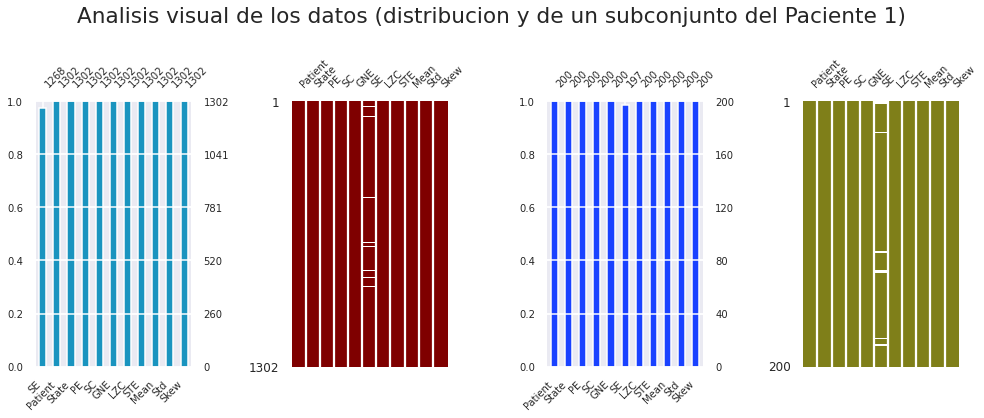

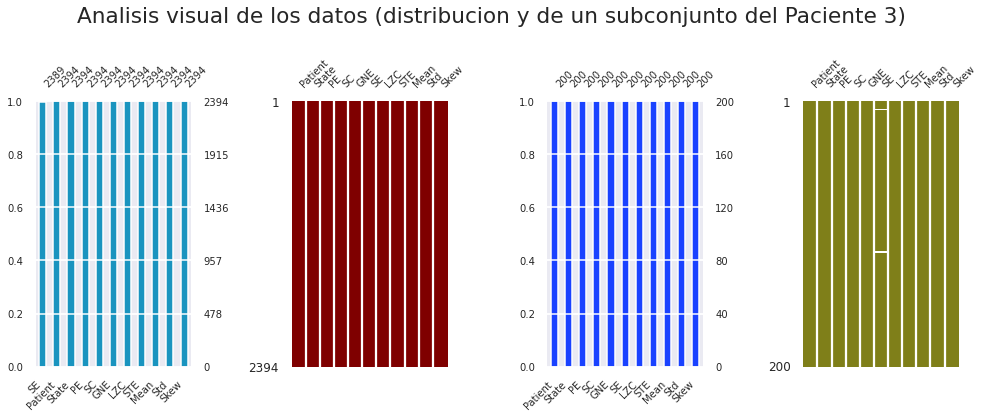

In [ ]:
fig_char = (1, 4, 14, 6)
nr, nc, fig_width, fig_height = fig_char

pat= [1, 2, 3]
for pat_i in pat:
    fig, ax = plt.subplots(nrows=nr, ncols=nc,figsize=(fig_width, fig_height))
    msno.bar(etiquetados[etiquetados.Patient==pat_i], fontsize=10, sort='ascending',\
             color=[0.1, 0.58, 0.75], ax=ax[0])
    msno.matrix(etiquetados[etiquetados.Patient==pat_i], sparkline=False, fontsize=10,\
                color=[0.5, 0, 0], ax=ax[1])
    msno.bar(etiquetados[etiquetados.Patient==pat_i].sample(200), fontsize=10,\
             color=[0.1, 0.26, 1.0], ax=ax[2])
    msno.matrix(etiquetados[etiquetados.Patient==pat_i].sample(200), sparkline=False,\
                fontsize=10, color=[0.5, 0.5, 0.1], ax=ax[3])
    plt.suptitle(f'Analisis visual de los datos (distribucion y de un subconjunto del Paciente {pat_i})')
    plt.tight_layout()

Análisis de la distribución de los datos en los tres pacientes del grupo NO etiquetado. 

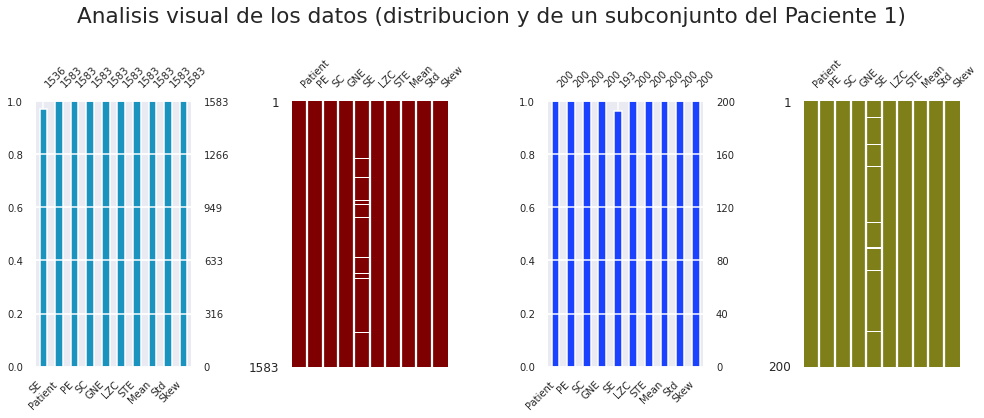

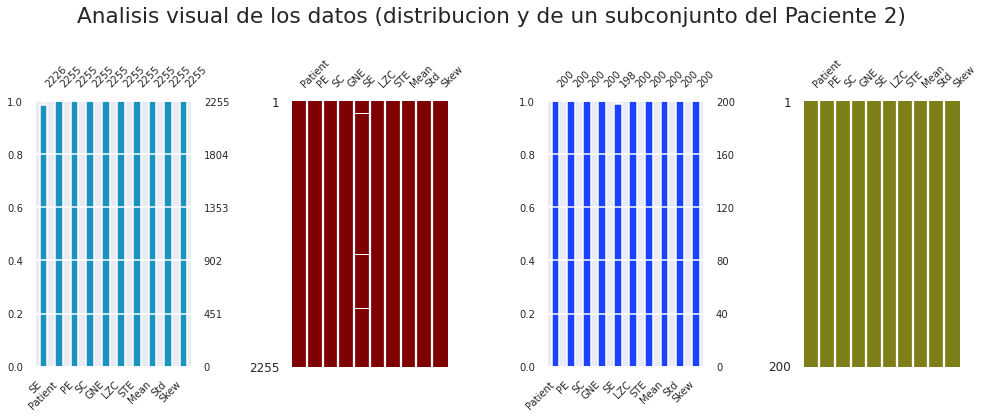

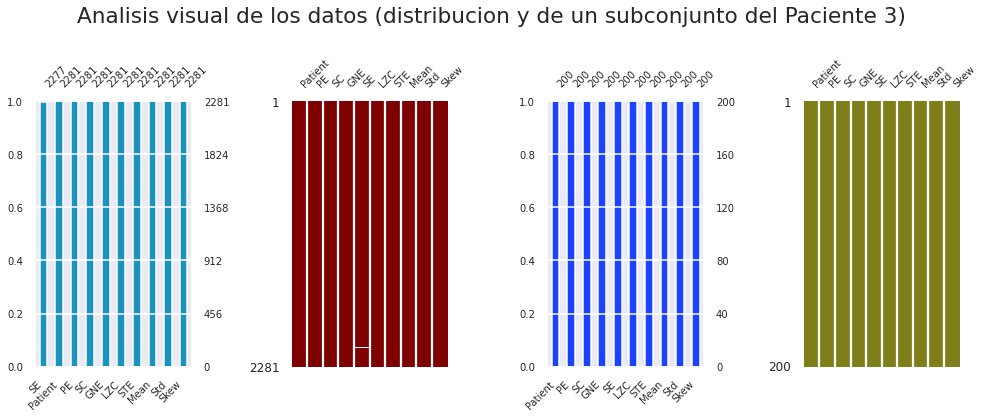

In [ ]:
fig_char = (1, 4, 14, 6)
nr, nc, fig_width, fig_height = fig_char

pat= [1, 2, 3]
for pat_i in pat:
    fig, ax = plt.subplots(nrows=nr, ncols=nc,figsize=(fig_width, fig_height))
    msno.bar(no_etiquetados[no_etiquetados.Patient==pat_i], fontsize=10, sort='ascending',\
             color=[0.1, 0.58, 0.75], ax=ax[0])
    msno.matrix(no_etiquetados[no_etiquetados.Patient==pat_i], sparkline=False, fontsize=10,\
                color=[0.5, 0, 0], ax=ax[1])
    msno.bar(no_etiquetados[no_etiquetados.Patient==pat_i].sample(200), fontsize=10,\
             color=[0.1, 0.26, 1.0], ax=ax[2])
    msno.matrix(no_etiquetados[no_etiquetados.Patient==pat_i].sample(200), sparkline=False,\
                fontsize=10, color=[0.5, 0.5, 0.1], ax=ax[3])
    plt.suptitle(f'Analisis visual de los datos (distribucion y de un subconjunto del Paciente {pat_i})')
    plt.tight_layout()

* De los resultados  encontrados se concluye que en el grupo etiquetado (tres conjuntos de datos):

La variable objetivo o target (categórica nominal binaria) está desbalanceada. Al estado 1 (pre-ictal) le corresponden 450 valores (7.45% del total) y al estado 0 (inter-ictal) 5592 valores (92.55% del total). Esto representará un aspecto que deberá tenerse en cuenta en la etapa de exploración y curación a la hora de balancear los datos previametne a la aplicación del modelo de clasificación (ya sea aprendizaje automático o profundo). 

* Por otro lado, del análisis de la variable nula se desprende que:

La variable/métrica de entropía espectral tiene 71 valores nulos en el conjunto de datos etiquetados y 88 en los datos no etiquetados. En el caso del grupo de pacientes etiquetados, de los 71 datos nulos; 34 (47.89%), 32 (45.07%) y 5 (7.04%) corresponden a los pacientes 1, 2 y 3 respectivamente. En el caso del grupo de pacientes sin etiquetar, del total de datos nulos 47 (58.75%), 29 (36.25%) y 4 (5%) corresponden a los pacientes 1, 2 y 3 respectivamente. Claramente se observa que en ambos grupos (etiquetados y sin etiquetar) la cantidad y distribución entre pacientes de datos nulos es aproximadamente igual (ver $\bf{NOTA}$). 
Por otro lado, al analizar la distribución total y de un muestreo aleatorio de 200 registros para cada paciente de los dos grupos (etiquetados y no etiquetados), se observa que la pérdida de datos es de tipo aleatoria. Esto implica que está relacionada solo con las características observadas y puede inferirse a partir de los conjuntos de datos en particular o en su defecto de los conjuntos de datos correspondientes a cada grupo (ya que la distribución sigue siendo aleatoria). Por otro lado y tal como se reportó, el total de datos faltantes en ambos grupos de conjuntos de datos, con y sin etiqueta, es muy bajo ( , etiquetados y sin etiquetar respectivamente) y se cuenta con un número suficiente de datos para llevar a cabo una imputación mediante un algoritmo modelo a determinar.

$\bf{NOTA}$: es importante tener en cuenta que esta métrica es función de un logaritmo, de aquí no pueda descartarse que el origen de los NaN son valores del argumento del logaritmo negativo o cero. 

Consulta: no sabemos como discriminariamos que métricas tienen mayor o menos importancia a la hora de predecir el 'State' en un paciente. 

* A continuación se analizará la correlación entre las variables continuas en función de:
1. Para el grupo de datos etiquetados, en función de las dos variables categóricas nominales (pacientes y estado).
2. Para el grupo de datos no etiquetados, en función de la única variable categórica nominal presente en el conjunto de datos (pacientes).

Conjuntos de datos etiquetados

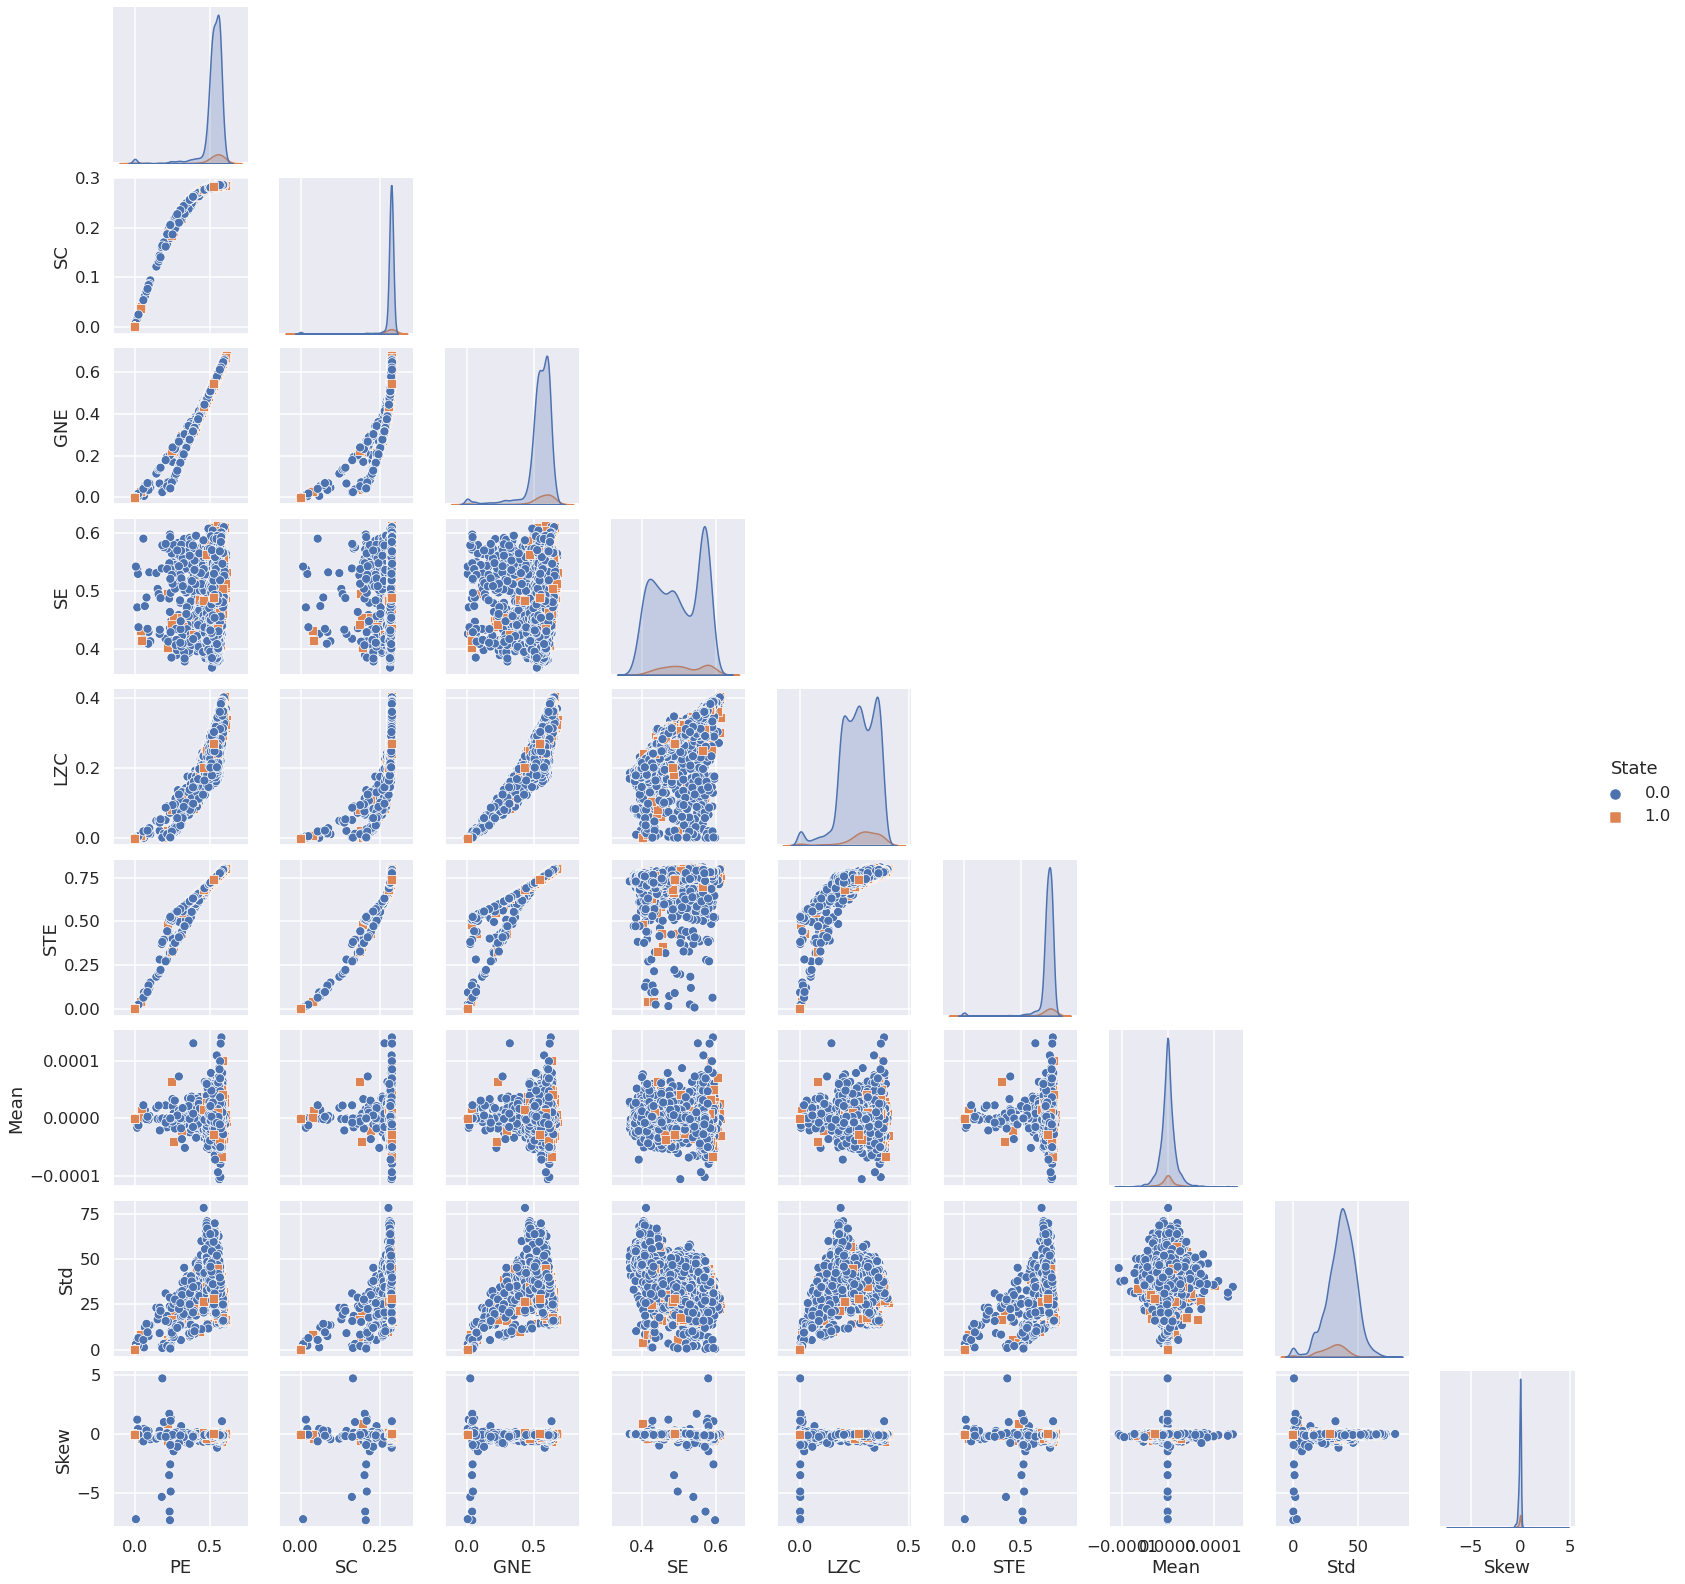

In [ ]:
etiquetados_data = etiquetados.drop('Patient',axis=1)
sns.pairplot(etiquetados_data, hue='State', markers=['o', 's'], corner=True)

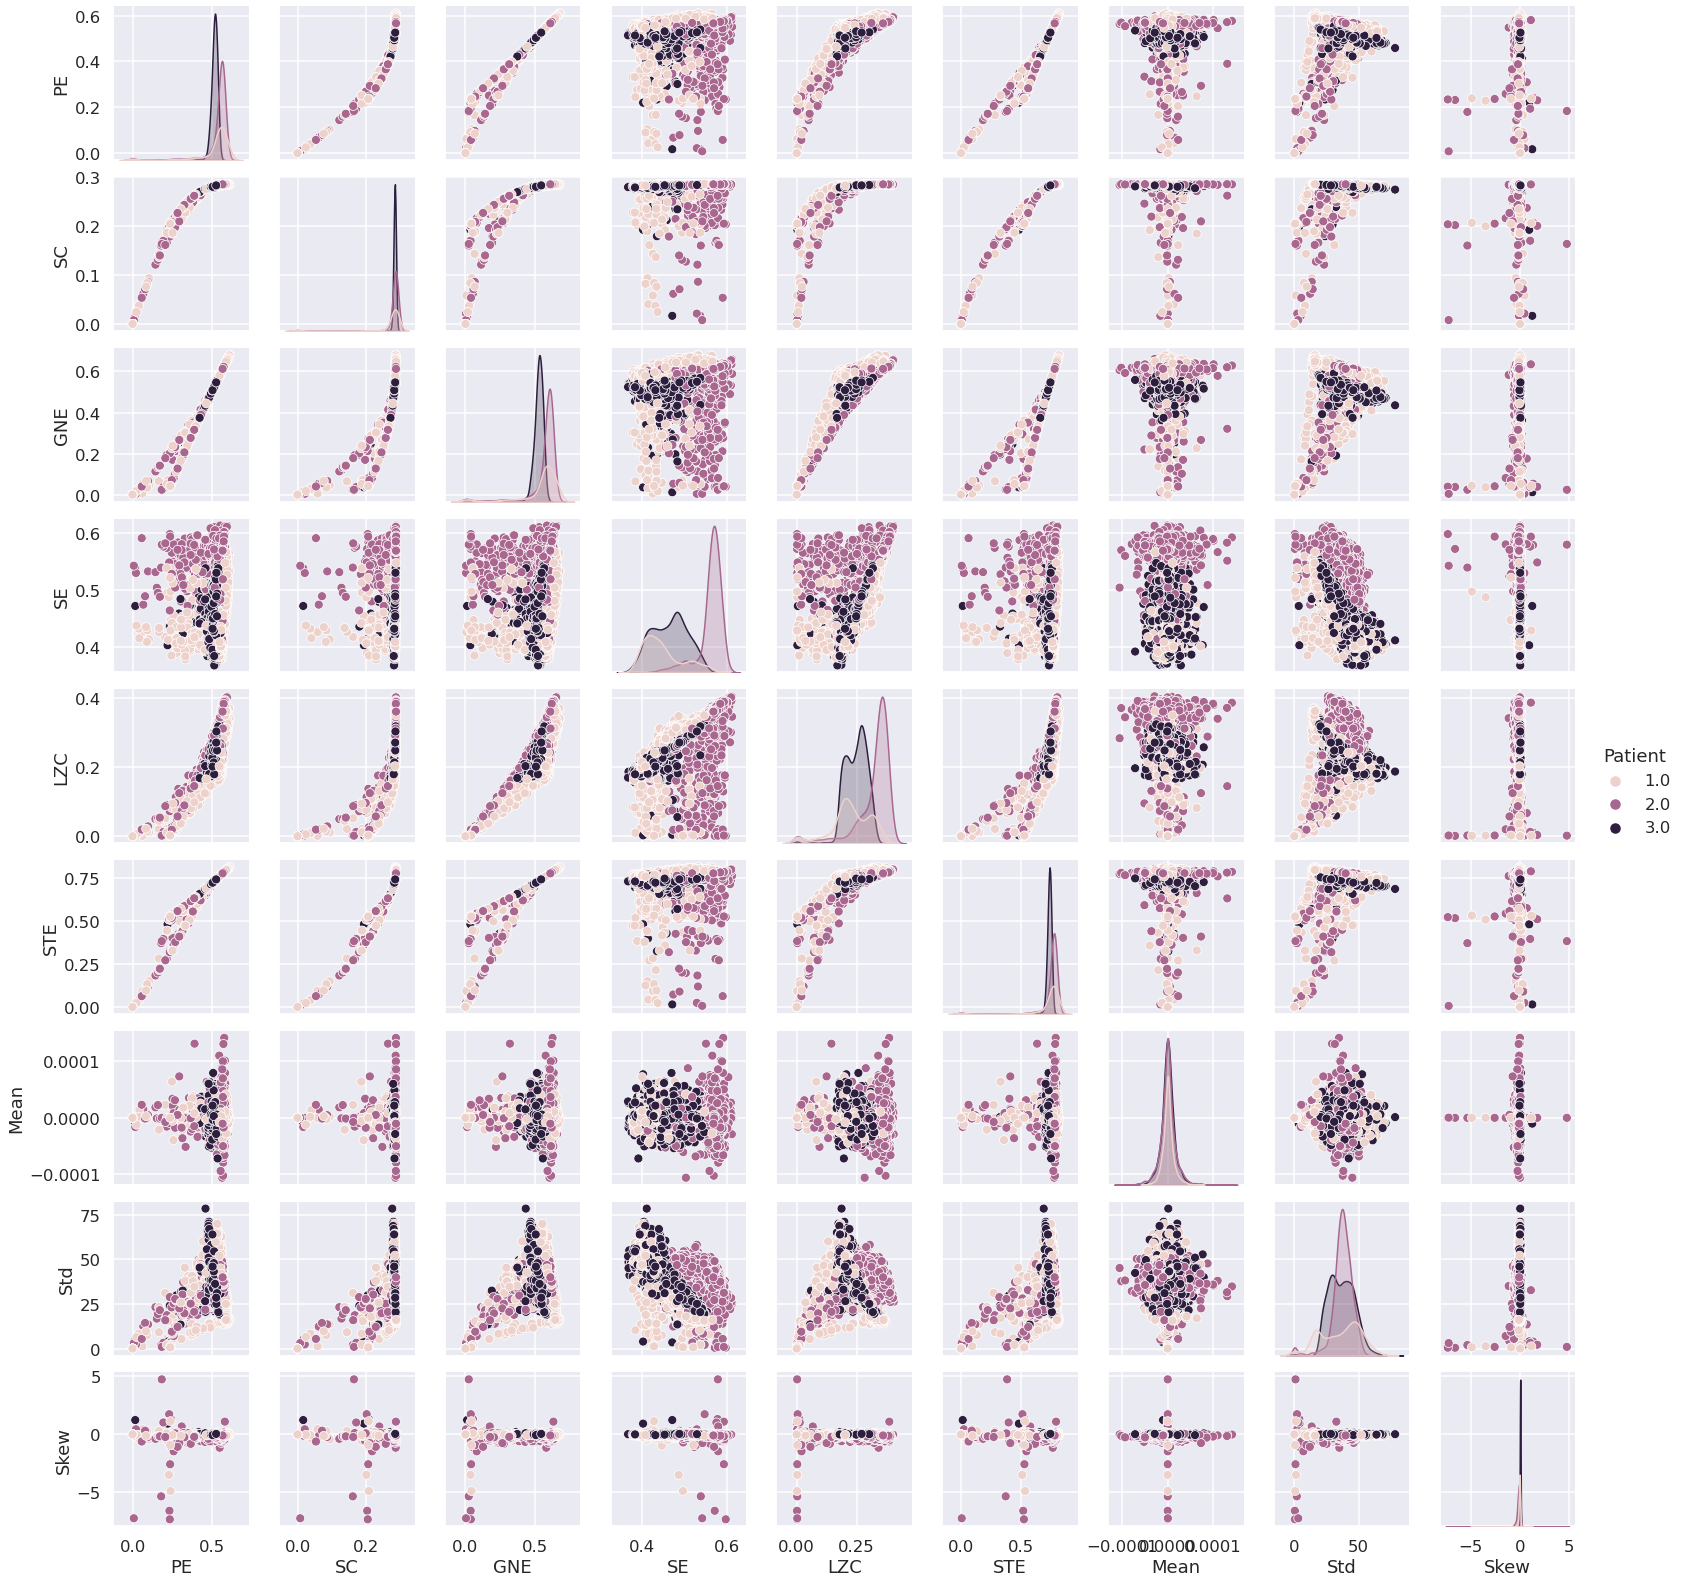

In [ ]:
etiquetados_data = etiquetados.drop('State',axis=1)
sns.pairplot(etiquetados_data, hue='Patient')

Sacamos las variables 'Patient' y 'State' para apreciar mejor las correlaciones entre las variables restantes. 

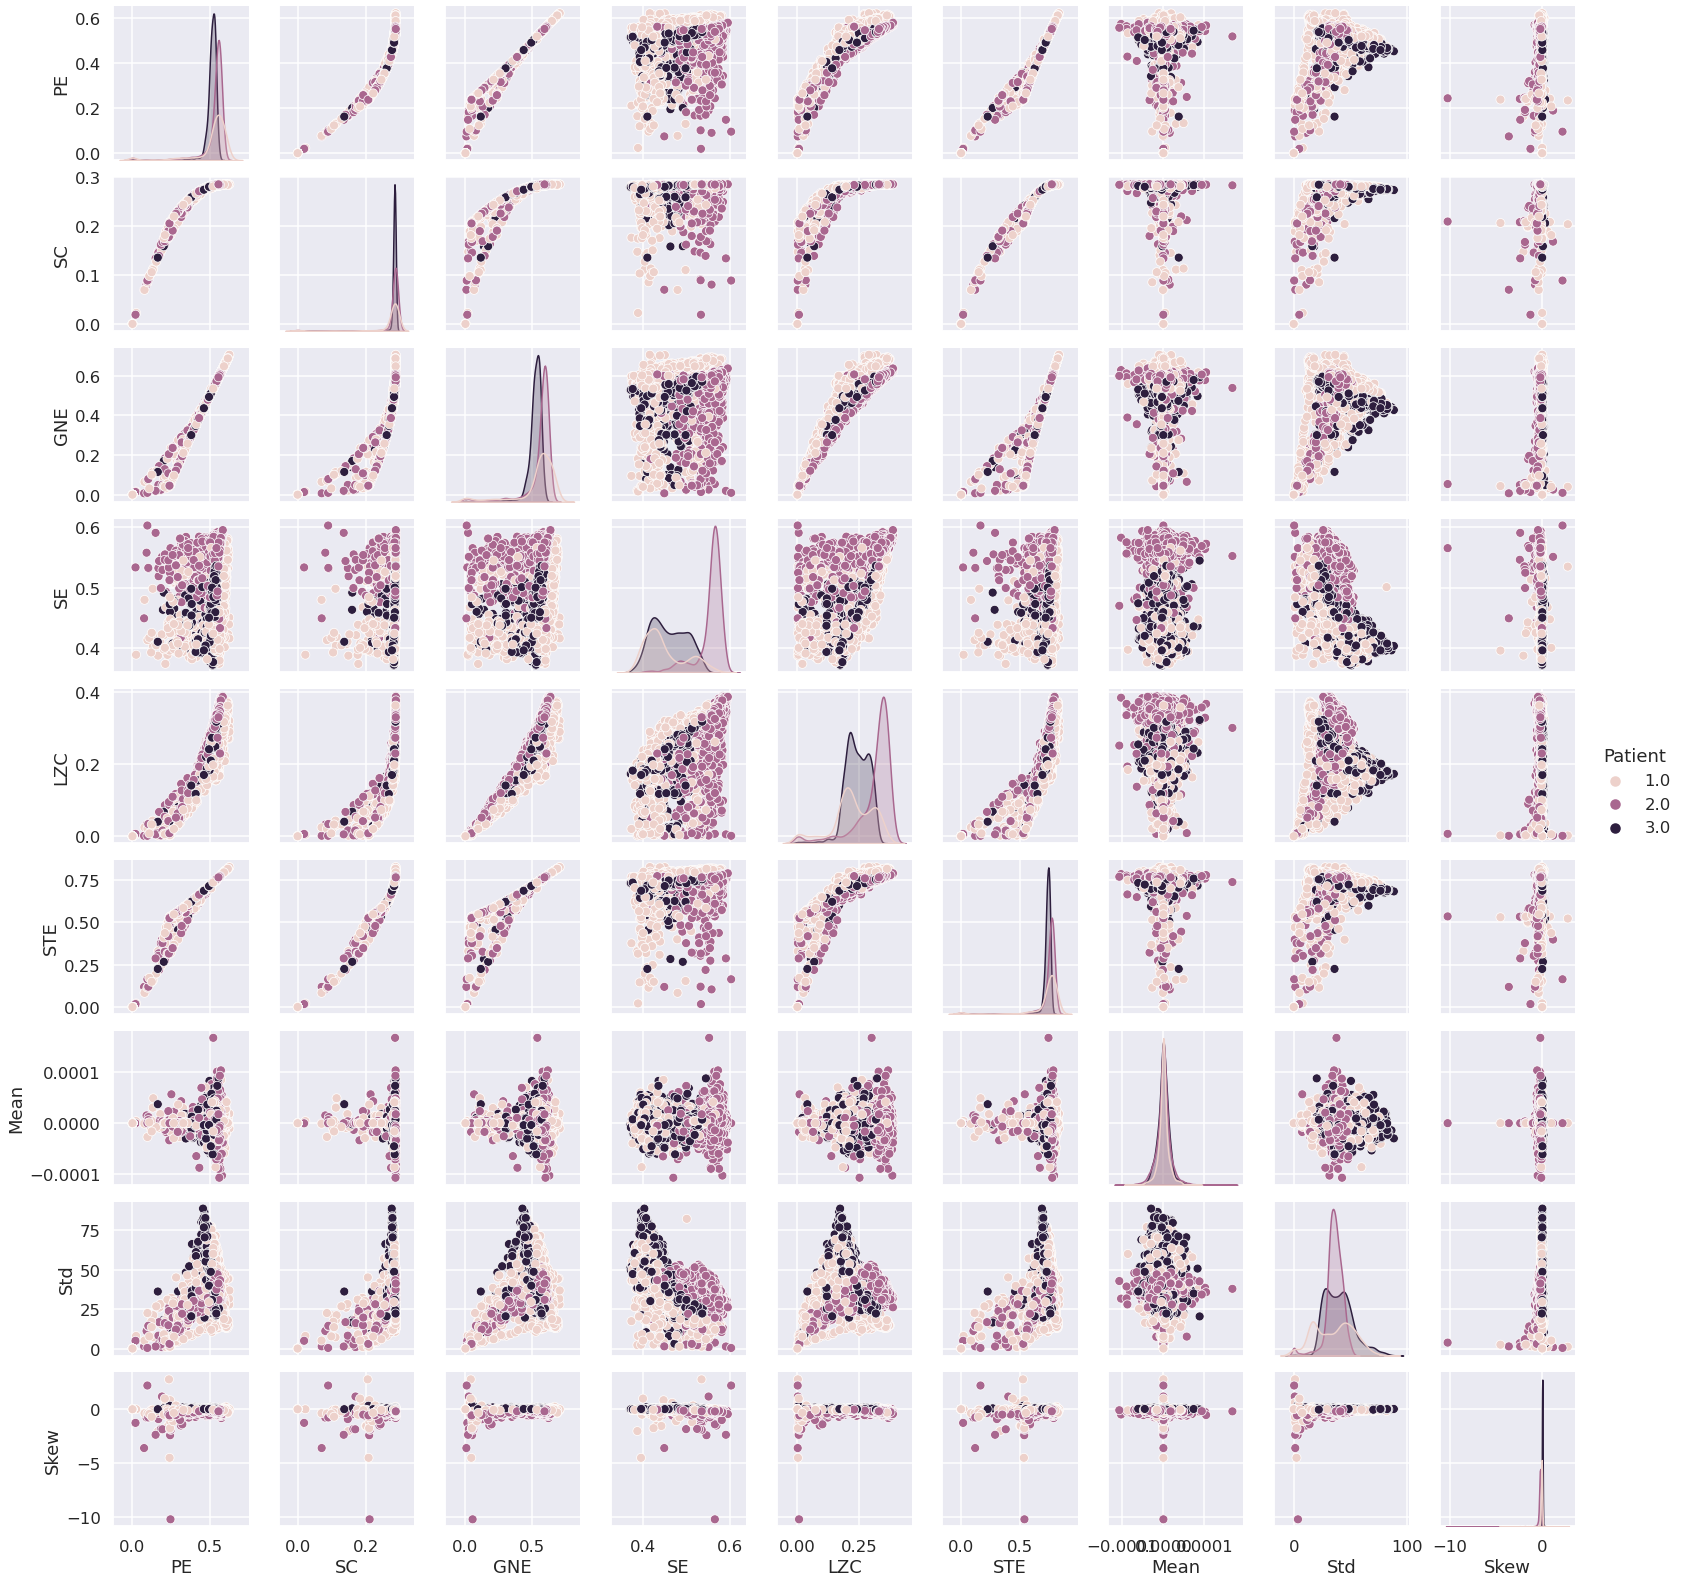

In [ ]:
sns.pairplot(no_etiquetados, hue='Patient')

Se puede observar que los comportamientos entre cada par de variables no cambia entre los dos conjuntos de datos: por ejemplo PE en funcion de SC tiene un comportamiento similar a una exponencial para ambos conjuntos de datos, y no se encuentran variables que posean alguna correlación en un conjunto de datos y que no posean ninguna en el otro. Si se observan diferencias apreciables en las distribuciones cuando discriminamos por paciente, pero debido al desbalanceo de datos no se observan tendencias apreciablemente distintas cuando se discrimina por estado. 

Visualizamos las correlaciones ahora en una matriz utilizando el comando `heatmap` de `Seaborn`

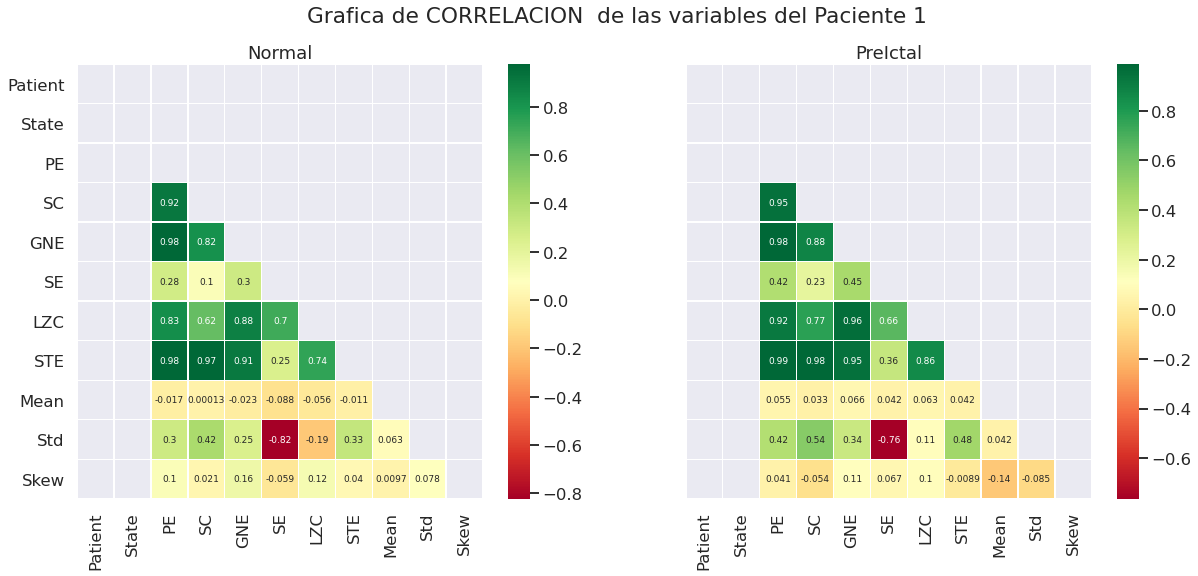

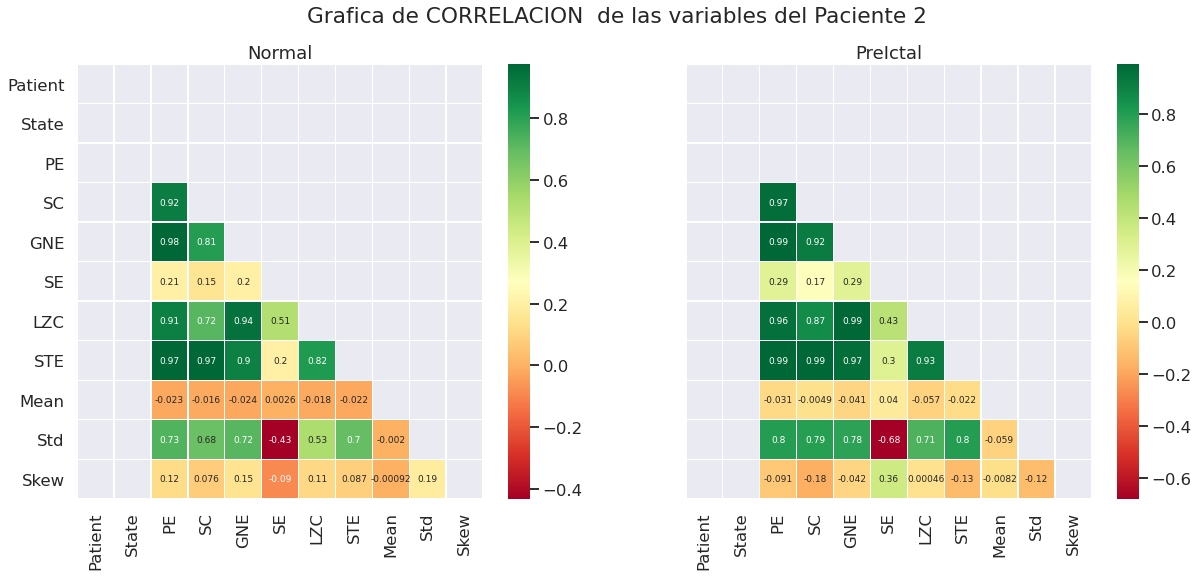

In [ ]:
''''
funcion para graficar la correlacion entre las variables/campos de cada uno de los pacientes CON ESTADO-.
'''
fig_char = (1, 2, 20, 8) 
nr, nc, fig_width, fig_height = fig_char

pat= [1,2,3]
for pat_i in pat:
    fig, ax = plt.subplots(nrows=nr, ncols=nc,
                           figsize=(fig_width, fig_height),
                           sharey=True
                          )
    # ir, icol = rel_col_matr_list[icol]
    # corr_0
    df= etiquetados.loc[etiquetados.Patient==pat_i]
    corr_0 = df[df.State == 0.0].corr()
    corr_1 = df[df.State == 1.0].corr()
    mask_0 = np.triu(np.ones_like(corr_0, dtype=bool))
    mask_1 = np.triu(np.ones_like(corr_1, dtype=bool))
    
    sns.heatmap(corr_0, mask=mask_0, cmap='RdYlGn',
                linewidths=0.30, annot=True, annot_kws={"size": 9},
                ax=ax[0]
               )
    sns.heatmap(corr_1, mask=mask_1, cmap='RdYlGn',
                linewidths=0.30, annot=True, annot_kws={"size": 9},
                ax=ax[1]
               )
    ax[0].set_title('Normal')
    ax[1].set_title('PreIctal')
    fig.suptitle(f'Grafica de CORRELACION  de las variables del Paciente {pat_i}')

A continuación se menciona para cada paciente del grupo etiquetado y en función de su estado una un listado con las variables continuas que presentan una correlacion > 0.8 con otras variables del mismo tipo:
1. Paciente 1:
* variable PE: correlación positiva con las variables STE, GNE, SC y LZC (correlaciones altas, mayores a 0.9). Los valores de las correlaciones aumentaron al pasar al estado PreIctal-.
* variable SC: correlación positiva con las variables STE y GNE y LZC (esta última igual a 0.77 solo en el estado pre-ictal). Los valores de las correlaciones aumentaron al pasar al estado PreIctal-.
* GNE: correlación positiva con las variables STE y LZC Los valores de las correlaciones aumentaron al pasar al estado PreIctal-.
* SE: correlación negativa con Std. El valor de la correlación disminuyó al pasar al estado PreIctal-.
* LZC: correlación positiva con las variables STE (solo en el caso pre-ictal). EL valor de la correlación aumentó al pasar al estado PreIctal-


2. Paciente 2:

* variable PE: correlación positiva con las variables STE, GNE, LZC y SC. Los valores de las correlaciones aumentaron al pasar al estado PreIctal-.
* variable SC: correlación positiva con las variables STE y GNE y LZC (esta última solo en el estado pre-ictal). Los valores de las correlaciones aumentaron al pasar al estado PreIctal-.
* GNE: correlación positiva con las variables STE y LZC. Los valores de las correlaciones aumentaron al pasar al estado PreIctal-.
* LZC: correlación positiva con las variables STE. EL valor de la correlación aumentó al pasar al estado PreIctal-


3. Paciente 3:
* variable PE: correlación positiva con las variables STE, GNE y SC. Los valores de las correlaciones aumentaron al pasar al estado PreIctal-.
* variable SC: correlación positiva con las variables STE y GNE  (esta solo en el estado pre-ictal). Los valores de las correlaciones aumentaron al pasar al estado PreIctal-.
* GNE: correlación positiva con las variables STE y LZC (esta solo en el estado pre-ictal). Los valores de las correlaciones aumentaron al pasar al estado PreIctal-.
* SE: correlación negativa con Std (solo en el estado inter-ictal) y con LZC en ambos estados . El valor de la correlación disminuyó al pasar al estado PreIctal-.
* LZC: correlación positiva con las variables STE (solo en el caso pre-ictal). EL valor de la correlación aumentó al pasar al estado PreIctal-


Como conlusión general puede dercirse que se observaron las mismas correlaciones para los tres pacientes y que solo en el caso de la variable SE, el resto aumenta al pasar al estado pre-ictal. En tanto tienden a incrementarse en el paciente 2.

In [ ]:
''''
funcion para graficar la correlacion entre las variables/campos de cada uno de los pacientes CON ESTADO-.
'''
fig_char = (1, 3, 20, 8) 
nr, nc, fig_width, fig_height = fig_char
fig, ax = plt.subplots(nrows=nr, ncols=nc,
                       figsize=(fig_width, fig_height),
                       sharey=True
                      )
pat= [1,2,3]
for pat_i in pat:
    # ir, icol = rel_col_matr_list[icol]
    # corr_0
    df= no_etiquetados.loc[no_etiquetados.Patient==pat_i]
    corr_0 = df.corr()
    mask_0 = np.triu(np.ones_like(corr_0, dtype=bool))
    sns.heatmap(corr_0, mask=mask_0, cmap='RdYlGn',
                linewidths=0.30, annot=True, annot_kws={"size": 8},
                ax=ax[pat_i-1]
               )
    ax[pat_i-1].set_title(f'Paciente {pat_i}')

fig.suptitle(f'Grafica de CORRELACION  de las variables del Paciente {pat_i} sin etiquetar')

Text(0.5, 0.98, 'Grafica de CORRELACION  de las variables del Paciente 3 sin etiquetar')

A continuación se menciona para cada paciente del grupo no etiquetado un listado con las variables continuas que presentan una correlacion > 0.8 con otras variables del mismo tipo:
* variable PE: correlación positiva con las variables STE, GNE, SC y LZC -solo pacientes 1 y 2- (correlaciones altas, mayores a 0.9). Los valores de las correlaciones aumentaron al pasar del paciente 1 al paciente 2.
* variable SC: correlación positiva con las variables STE y GNE -solo pacientes 1 y 2-. Los valores de las correlaciones se mantienen constantes entre los pacientes 1 y 2 y disminuyen en el paciente 3.
* GNE: correlación positiva con las variables STE y LZC-solo pacientes 1 y 2-. Los valores de las correlaciones se son mayores en el paciente 2.
* SE: correlación negativa con Std y positiva de LZC solo en el paciente 3. El valor de la correlación es mayor para el paciente 3.
* LZC: correlación positiva con la variable STE solo en el paciente 2. 

A partir del análisis realizado se concluye que:

* Existen muchas variables con altos coeficientes de correlación.
* En el caso del grupo de pacientes etiquetados, más allá de alguna variación puntual, la correlación es la misma entre los tres pacientes entre los mismos y diferentes estados.
* En el caso de los pacientes no etiquetados, al igual que en el grupo de pacientes etiquetados, más allá de alguna variación puntual la correlación se mantiene entre los tres pacientes.
* Finalmente, entre los dos grupos las correlaciones entre las diferentes variables continuas es la misma.

Estos aspectos deberán ser tenidos en cuenta al momento de seleccionar el/los conjunto/s de dato/s en función de la colinealidad de las variables y su influencia en los resultados que se encuentren.




Las variables/atributos correlacionadas en general no mejoran los  modelos de AA/AP -aprendizaje automático/aprendizaje profundo- (aunque depende de las características específicas del problema, como el número de variables/atributos y el grado de correlación); sin embargo, afectan modelos específicos de diferentes maneras y en diferentes grados: modelos lineales, ej., regresión lineal y/o regresión logística, la multicolinealidad puede dar lugar a soluciones que varían ampliamente y que posiblemente sean numéricamente inestables.


Los modelos de Random Forest pueden ser buenos para detectar interacciones entre diferentes atributos/variables, sin embargo los atributos/variables altamente correlacionados pueden enmascarar estas interacciones. En general, esto puede verse como un caso especial de la NAVAJA DE OCCAM (Occam's razor). Un modelo simple es preferible y, en gran modo, un modelo con menos features es más simple. El concepto de Longitu Mínima de Descripción lo hace más preciso. Ver:
* https://en.wikipedia.org/wiki/Multicollinearity#Consequences_of_multicollinearity
* https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/



Luego del análisis realizado y pensando en las etapas que siguen, deberemos pensar en las transformaciones que podríamos usar para exponer/poner de manifiesto la estructura del DS en general por medio las cuales podamos mejorar 
la precisión del modelo de AA y/o AP. De aquí que tengamos que considerar:
* La selección de atributos/variables/características basada en remover los atributos/variables más correlacionados.
* NORMALIZACIÓN y ESCALABILIDAD del/los conjunto/s de datos/s para reducir los efectos de los OUTLIERS  y de las diferentes escalas de las variables/atributos del DS.




------------------------------------
### 3. Visualización

Veamos las distribuciones de las variables en los datos etiquetados

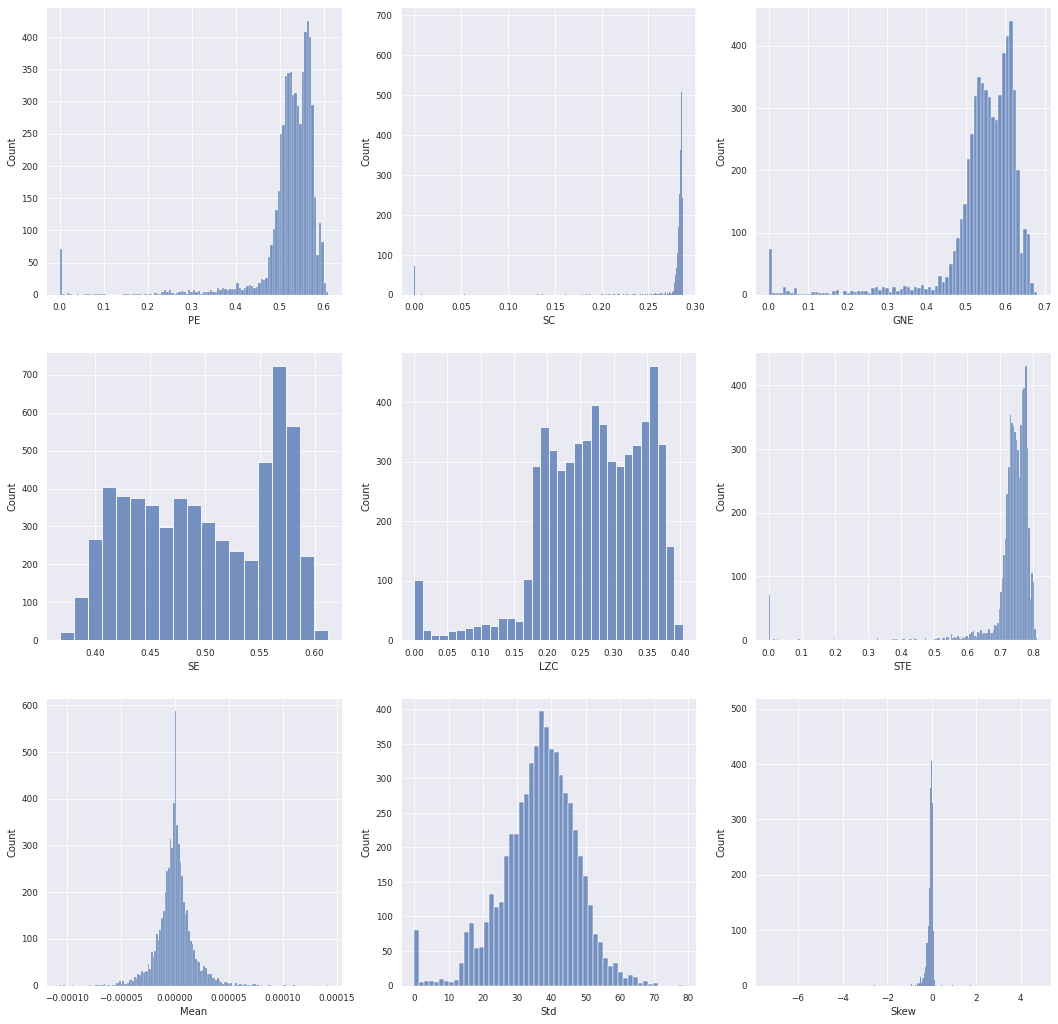

In [ ]:
sns.set_context("paper", rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":10})
features = ['PE', 'SC', 'GNE','SE','LZC','STE','Mean','Std','Skew']
plt.subplots(3,3,figsize=(18,18))
for feature in features:
    plt.subplot(3,3,features.index(feature)+1)
    sns.histplot(data=etiquetados, x=feature)

In [ ]:
sns.set_context("paper", rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":10})
features = ['PE', 'SC', 'GNE','SE','LZC','STE','Mean','Std','Skew']
plt.subplots(3,3,figsize=(18,18))
for feature in features:
    plt.subplot(3,3,features.index(feature)+1)
    sns.histplot(data=etiquetados, x=feature, hue='State',palette='Dark2')

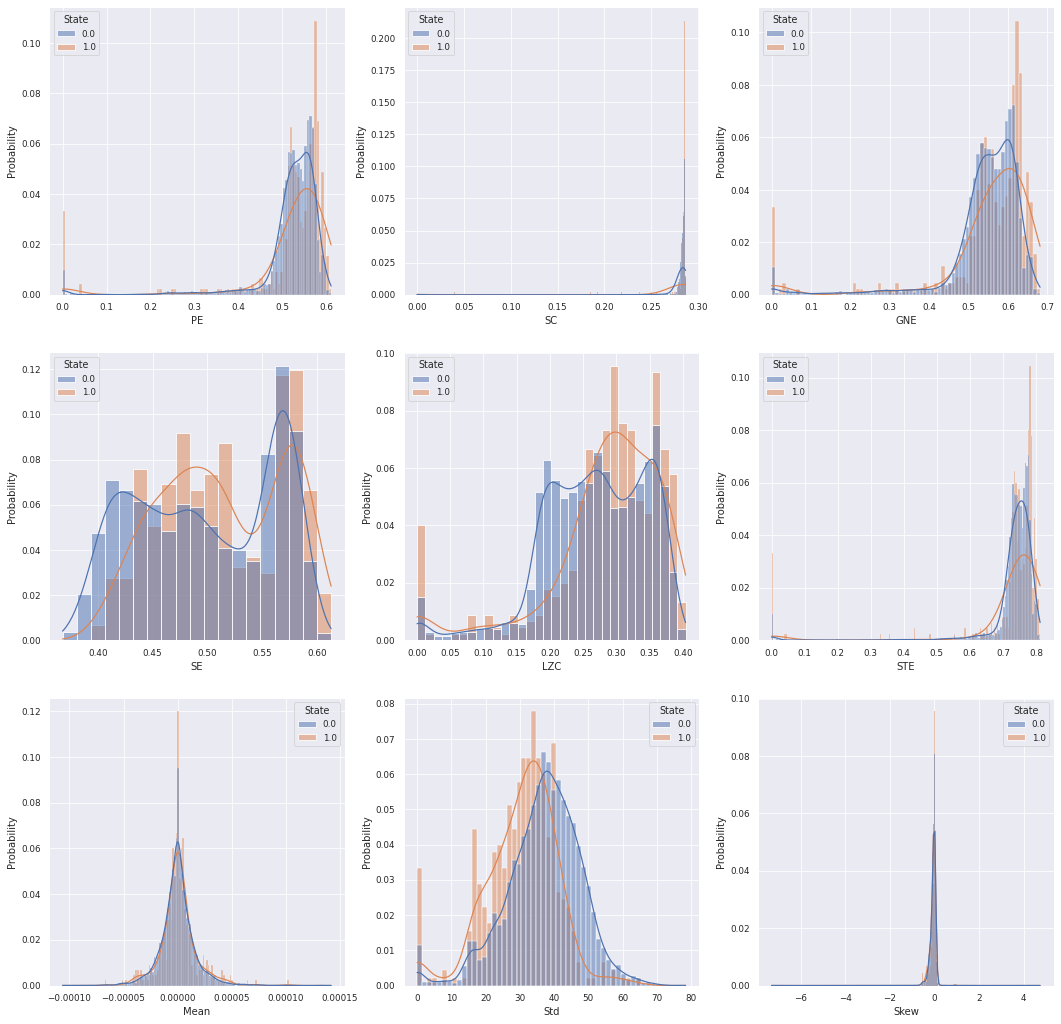

In [ ]:
sns.set_context("paper", rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":10})
features = ['PE', 'SC', 'GNE','SE','LZC','STE','Mean','Std','Skew']
plt.subplots(3,3,figsize=(18,18))
for feature in features:
    plt.subplot(3,3,features.index(feature)+1)
    # sns.histplot(data=etiquetados, x=feature, hue='State', stat="density", common_norm=True, fill=False)
    # stat ==> 'count', 'density', 'probability', 'frequency'
    sns.histplot(data=etiquetados, x=feature, hue='State', stat='probability', common_norm=False, kde='True')

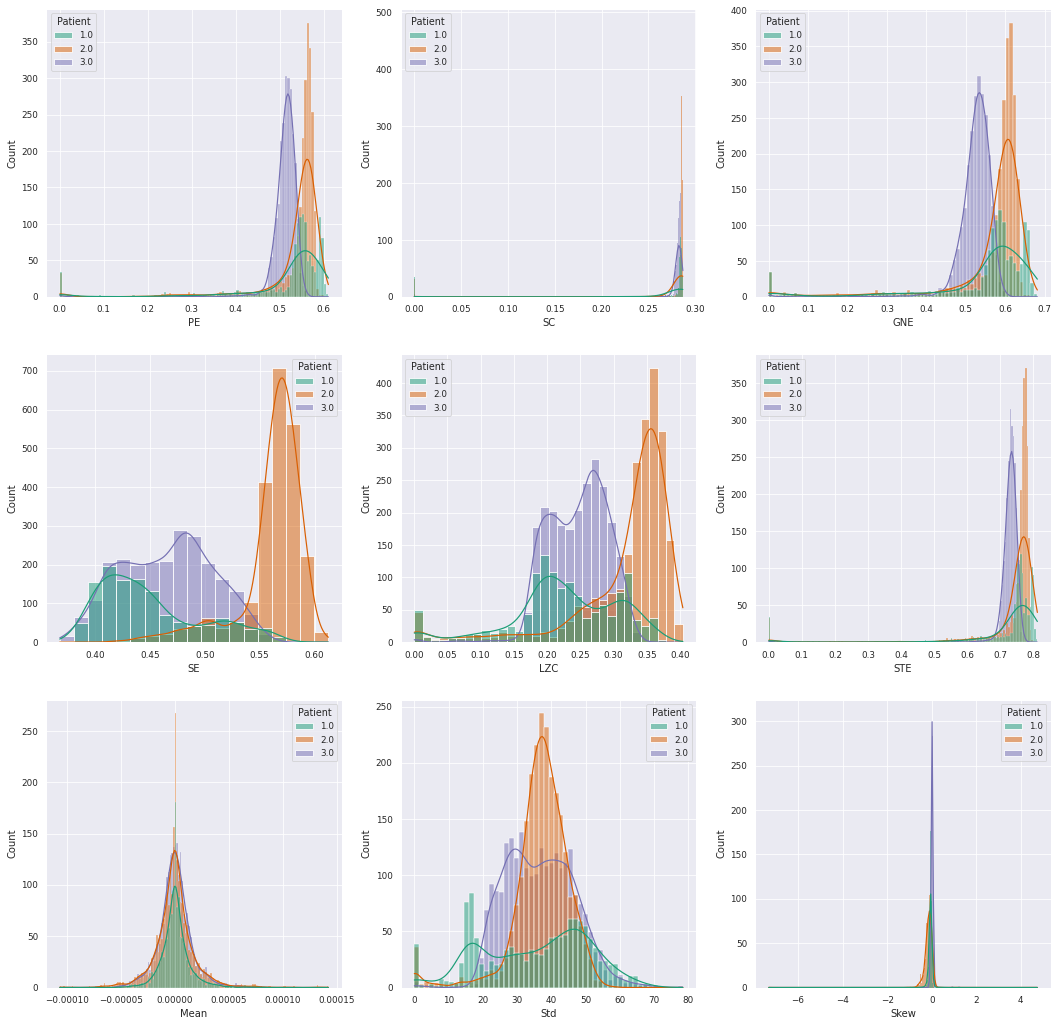

In [ ]:
features = ['PE', 'SC', 'GNE','SE','LZC','STE','Mean','Std','Skew']
#plt.figure(figsize=[20,20])
plt.subplots(3,3,figsize=(18,18))
for feature in features:
    plt.subplot(3,3,features.index(feature)+1)
    sns.histplot(etiquetados,x=feature,hue='Patient',palette='Dark2',kde=True)

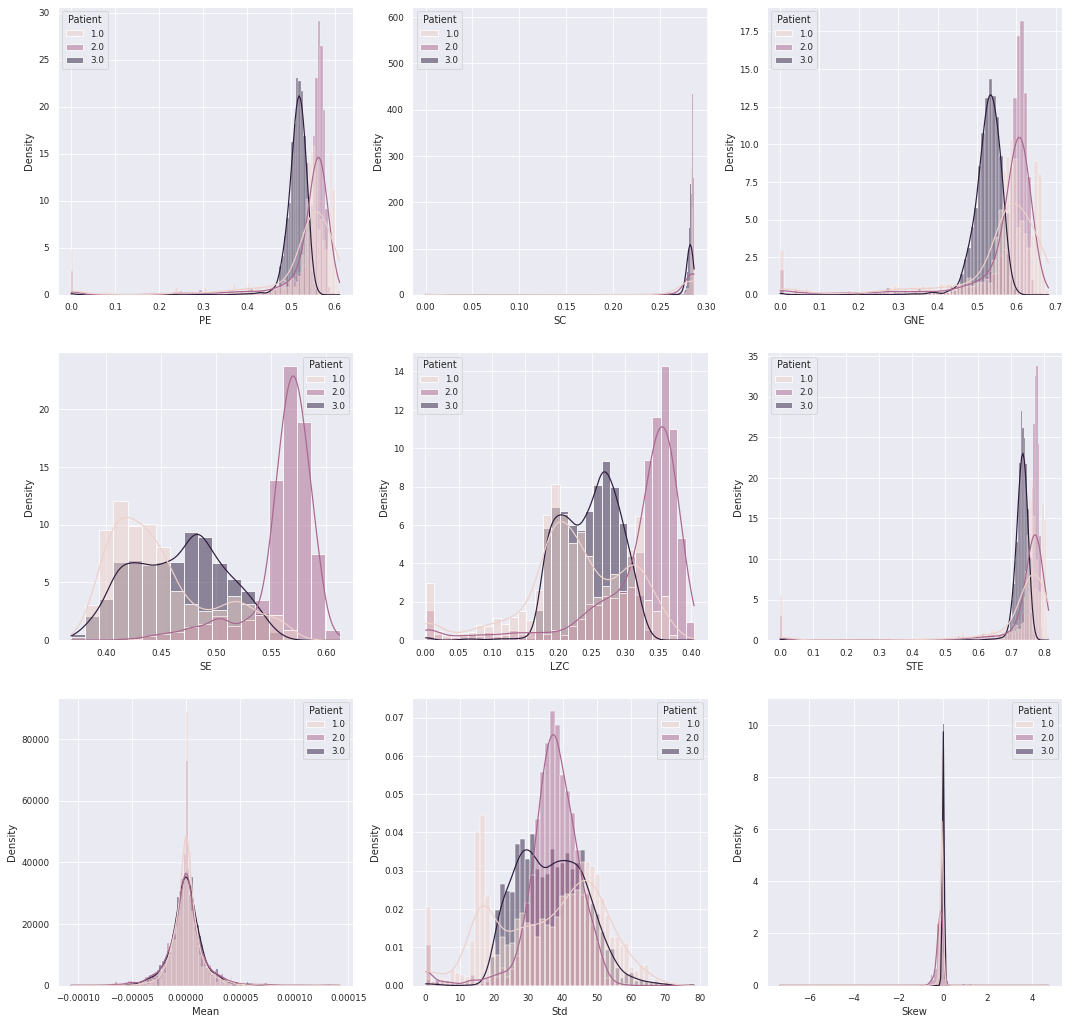

In [ ]:
sns.set_context("paper", rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":10})
features = ['PE', 'SC', 'GNE','SE','LZC','STE','Mean','Std','Skew']
plt.subplots(3,3,figsize=(18,18))
for feature in features:
    plt.subplot(3,3,features.index(feature)+1)
    # sns.histplot(data=etiquetados, x=feature, hue='State', stat="density", common_norm=True, fill=False)
    # stat ==> 'count', 'density', 'probability', 'frequency'
    sns.histplot(data=etiquetados, x=feature, hue='Patient', stat='density', common_norm=False, kde='True')

*Para este grupo (tres pacientes etiquetados) se han graficado: (i) las distribuciones sin discriminar pacientes y/o estados; (ii) las distribuciones discriminando estados, y (iii) discriminando los pacientes. Al analizar las gráficas se observa que:
1. La distribución de las variables 'Mean', 'Std' y 'STE' presentan una distribución que "podría aproximarse" a una  normal.
2. La distribución de las variables 'Skew' y 'SC' se asemejan a deltas de Dirac.
3. Par el resto de las variables, no obstante a partir de un análisis cualitativo no puede inferirse a qué tipo de distribución se asemejan. 
4. Un aspecto que debería analizarse con mayor profundidad es el origen de los valores nulos presentes en las métricas PE, GNE, STE y Std (tener presente que las métricas graficadas corresponden a post-procesamiento de las señales medidas con EEG).

Al comparar las gráficas de las variables discriminando estado sae observa que son semejantes, diferenciándose la cantidad que corresponde a cada estado (esto tiene sentido teniendo en cuenta el análisis realizado: 92.55 % de los datos corresponden a la etiqueta 0 -inter-ictal- y solo un 7.45 % a la etiqueta 1 -pre-ictal-. A continuación y para independizarnos de la cantidad de registros correspondientes a cada estado, se graficaron las distribución dsicreta y continua -aproximada- correspondiente a cada estado. Claramente se observa que la distribución de los datos tiende a ser independiente del estado.

Finalmente, al analizar las gráficas de las distribuciones de las variables discriminando por paciente, se desprende  que a cada paciente y para cada métrica le corresponden distribuciones diferentes, de aquí el caráter mutimodal de las métricas.


Luego del análisis realizado y pensando en las etapas que restan, deberemos pensar en las transformaciones que podríamos usar para exponer/poner de manifiesto la estructura del conjunto de datos en general por medio las cuales podamos mejorar la precisión del modelo de AA y/o AP. De aquí que tengamos que considerar:
* ESTANDIZARIZACIÓN del/los conjunto/s de datos/s para reducir los efectos de las diferentes distribuciones observadas en los atributos/variables del DS (existen modelos que funcionan mejor con determinadas distribuciones de los datos)-.

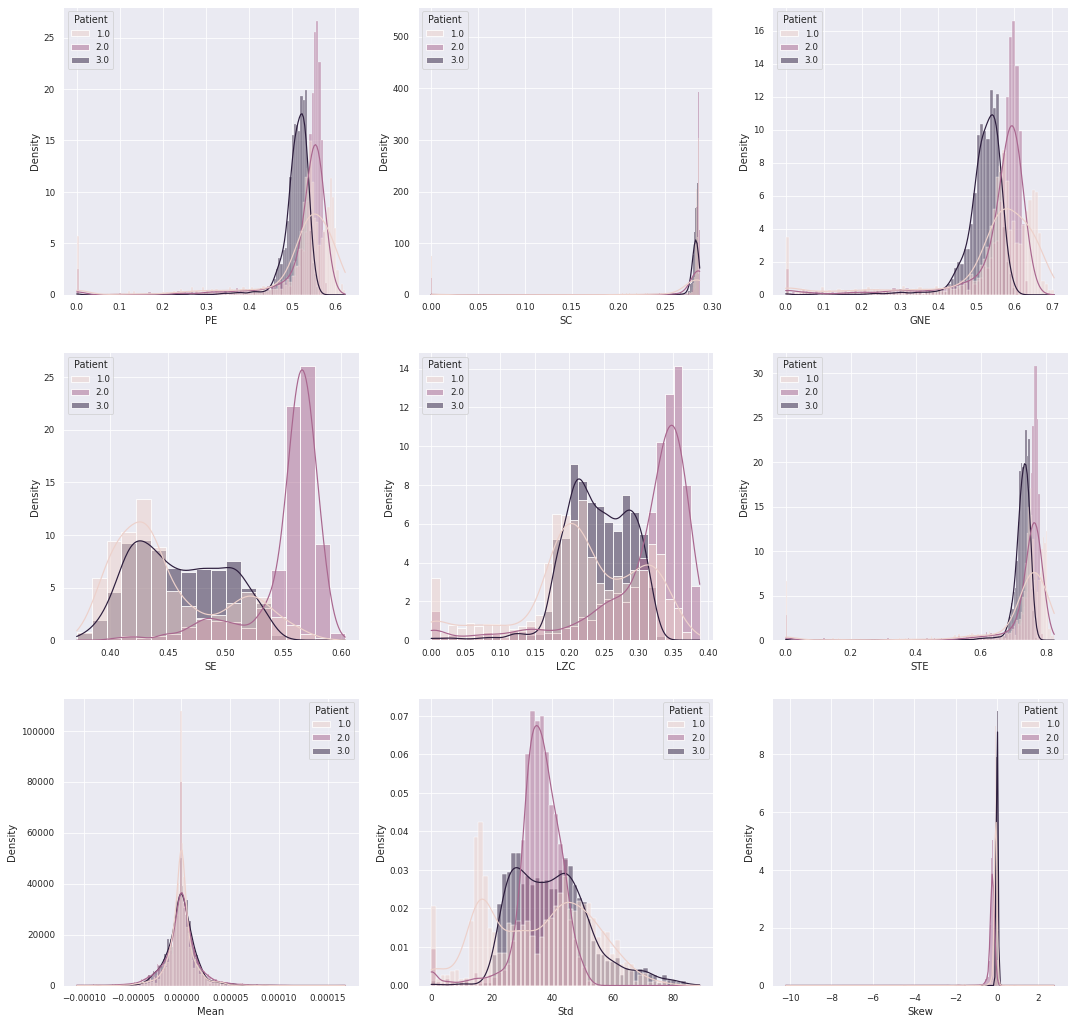

In [ ]:
sns.set_context("paper", rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":10})
features = ['PE', 'SC', 'GNE','SE','LZC','STE','Mean','Std','Skew']
plt.subplots(3,3,figsize=(18,18))
for feature in features:
    plt.subplot(3,3,features.index(feature)+1)
    # sns.histplot(data=etiquetados, x=feature, hue='State', stat="density", common_norm=True, fill=False)
    # stat ==> 'count', 'density', 'probability', 'frequency'
    sns.histplot(data=no_etiquetados, x=feature, hue='Patient', stat='density', common_norm=False, kde='True')

Análisis de los outliers en ambos grupos de pacientes

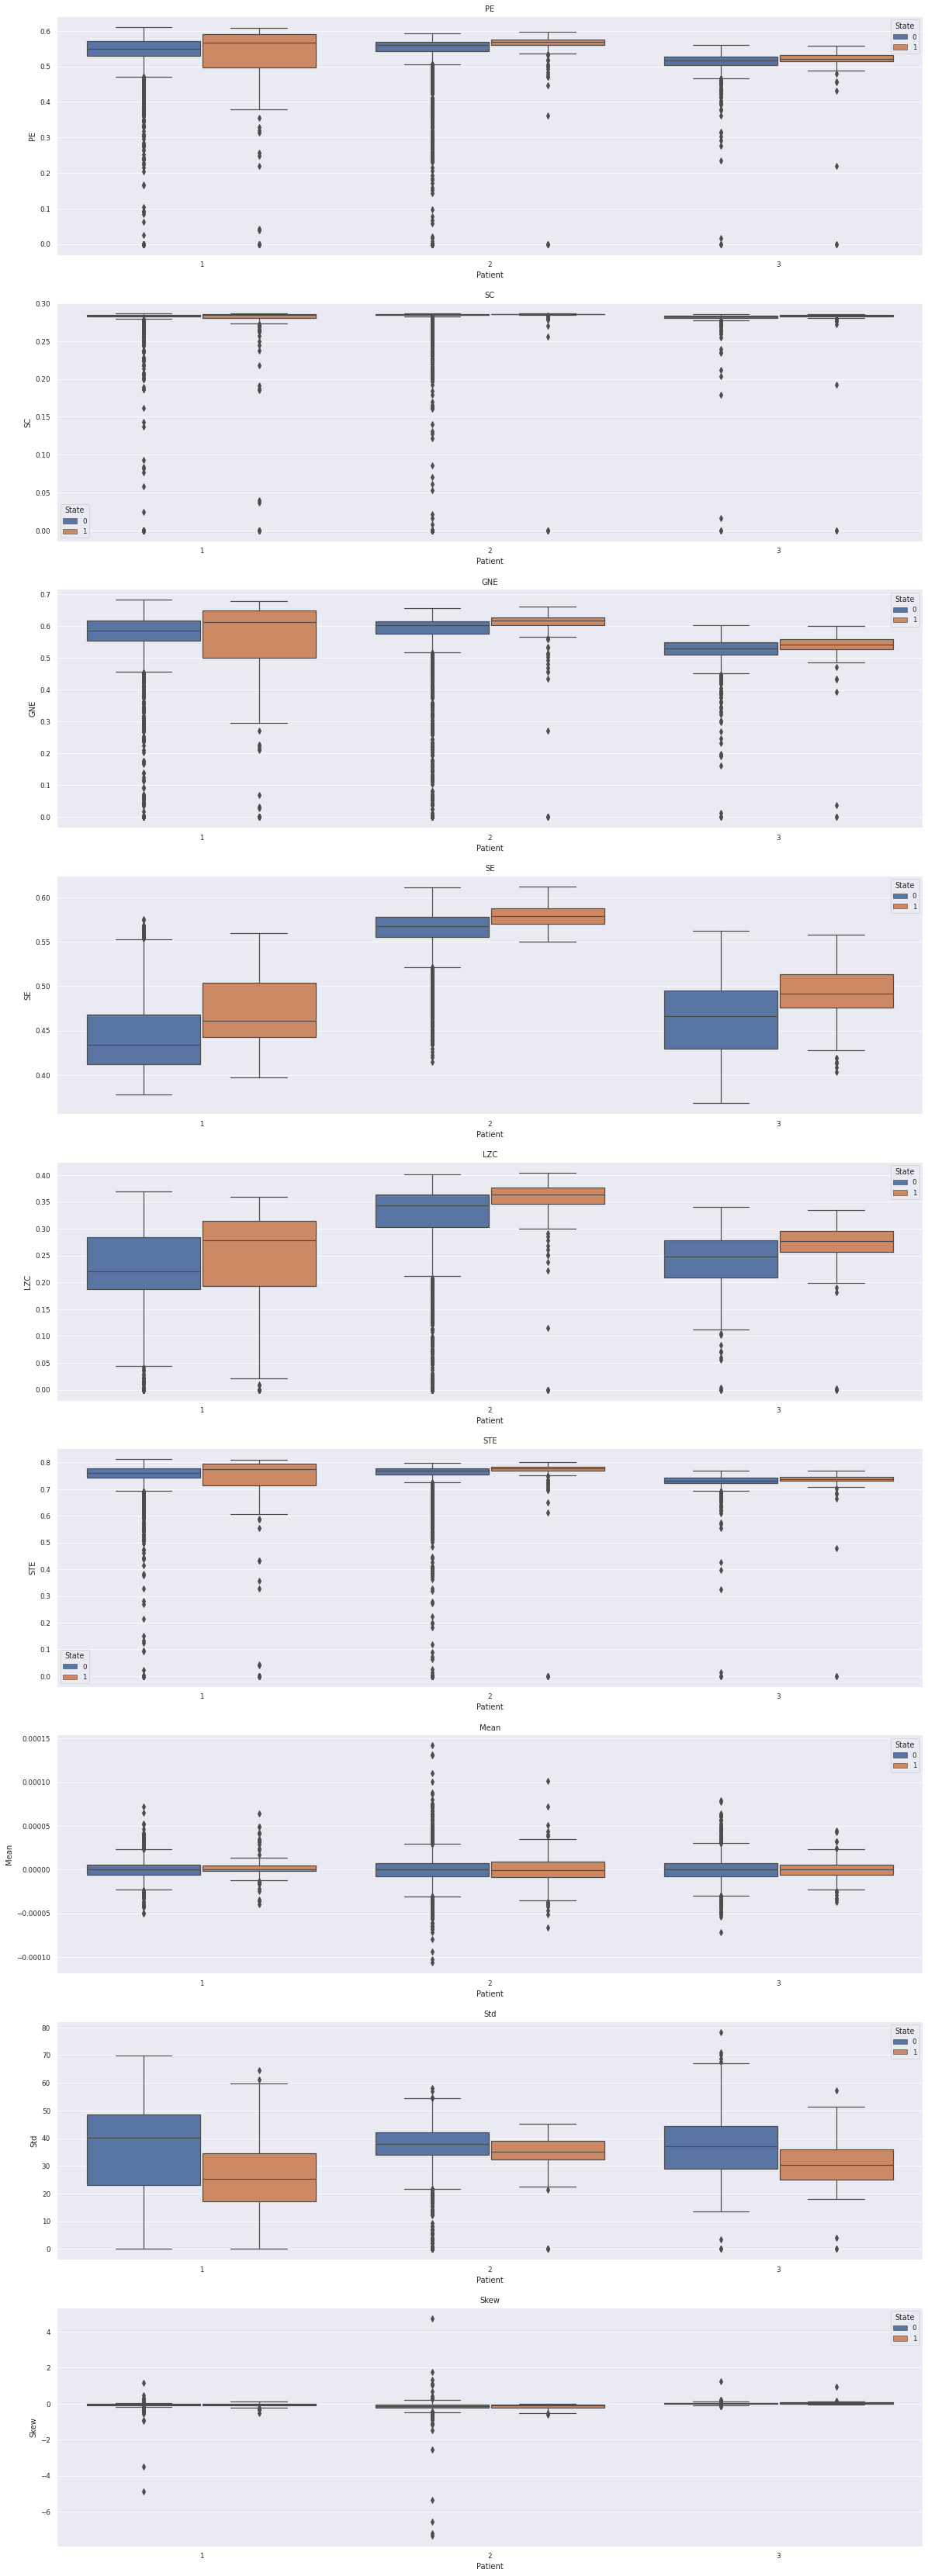

In [ ]:
etiquetados["State"]=etiquetados["State"].astype(int)
etiquetados["Patient"]=etiquetados["Patient"].astype(int)
no_etiquetados["Patient"]=no_etiquetados["Patient"].astype(int)

metricas = etiquetados.drop(axis=1, labels=["Patient", "State"]).columns

fig, axes = plt.subplots(len(metricas), figsize=(20,60))

for i,column in enumerate(metricas):
    sns.boxplot(ax=axes[i], data=etiquetados, y=column, x="Patient", hue='State')
    axes[i].set_title(column)

for ax in axes:
    ax.tick_params(axis='y')

In [ ]:
# Examinamos con mayor detalle los % de datos de cada variable
# correspondientes a OUTLIERS-.
def get_out(ps_val, tot_vals):
    # IQR -InterQuartilRange-
    iqr = abs(ps_val.quantile(0.25, interpolation='nearest')-
              ps_val.quantile(0.75, interpolation='nearest'))
    llp = ps_val.quantile(0.25) - (1.5*iqr) # lower_limit_point-.
    ulp = ps_val.quantile(0.75) + (1.5*iqr) # upper_limit_point-.
    # check if there is/are outlier/s-.
    if ps_val.min() > llp and ps_val.max() < ulp:
        por_out= 0.0
    else:
        ps_val_col= ps_val[(ps_val < llp) | (ps_val > ulp)]
        por_out= np.shape(ps_val_col)[0]*100/tot_vals
        return por_out
df= etiquetados.drop(['Patient','SE'], axis=1)  
for ps_name, ps_val in df.items():
    por_out = get_out(ps_val, np.shape(df)[0])
    print('Variable {0:<20} {1:<20} {2:>5.2f}{3:>2}'.format(ps_name, 'OUTLIERS', por_out, '%'))
# val = ps_val.apply(get_out, convert_dtype=False)

Variable State                OUTLIERS              7.45 %
Variable PE                   OUTLIERS              6.04 %
Variable SC                   OUTLIERS              7.73 %
Variable GNE                  OUTLIERS              6.04 %
Variable LZC                  OUTLIERS              2.15 %
Variable STE                  OUTLIERS              6.04 %
Variable Mean                 OUTLIERS              8.01 %
Variable Std                  OUTLIERS              2.55 %
Variable Skew                 OUTLIERS              5.43 %


Como se observa:
* Las medias entre mismas variables para los dos estados toman valores aproximados (tal como se observa principalmente en las variables con distribuciones que se aproximan a la normal).
* Los intervalos que definen los rangos intercuartílicos son aproximados entre variables de una misma variable para los dos estados. El paciente que presenta la mayor cantidad de outliers es el paciente 1.
* Todas las variables presentan outliers y en mayor cantidad en el estado 0 inter-ictal.
* A continuación se presentan los porcenatjes del total de valores de cada variable (sin discriminar paciente y/o estado):


    Variable State                OUTLIERS              7.45 %
    Variable PE                   OUTLIERS              6.04 %
    Variable SC                   OUTLIERS              7.73 %
    Variable GNE                  OUTLIERS              6.04 %
    Variable LZC                  OUTLIERS              2.15 %
    Variable STE                  OUTLIERS              6.04 %
    Variable Mean                 OUTLIERS              8.01 %
    Variable Std                  OUTLIERS              2.55 %
    Variable Skew                 OUTLIERS              5.43 %

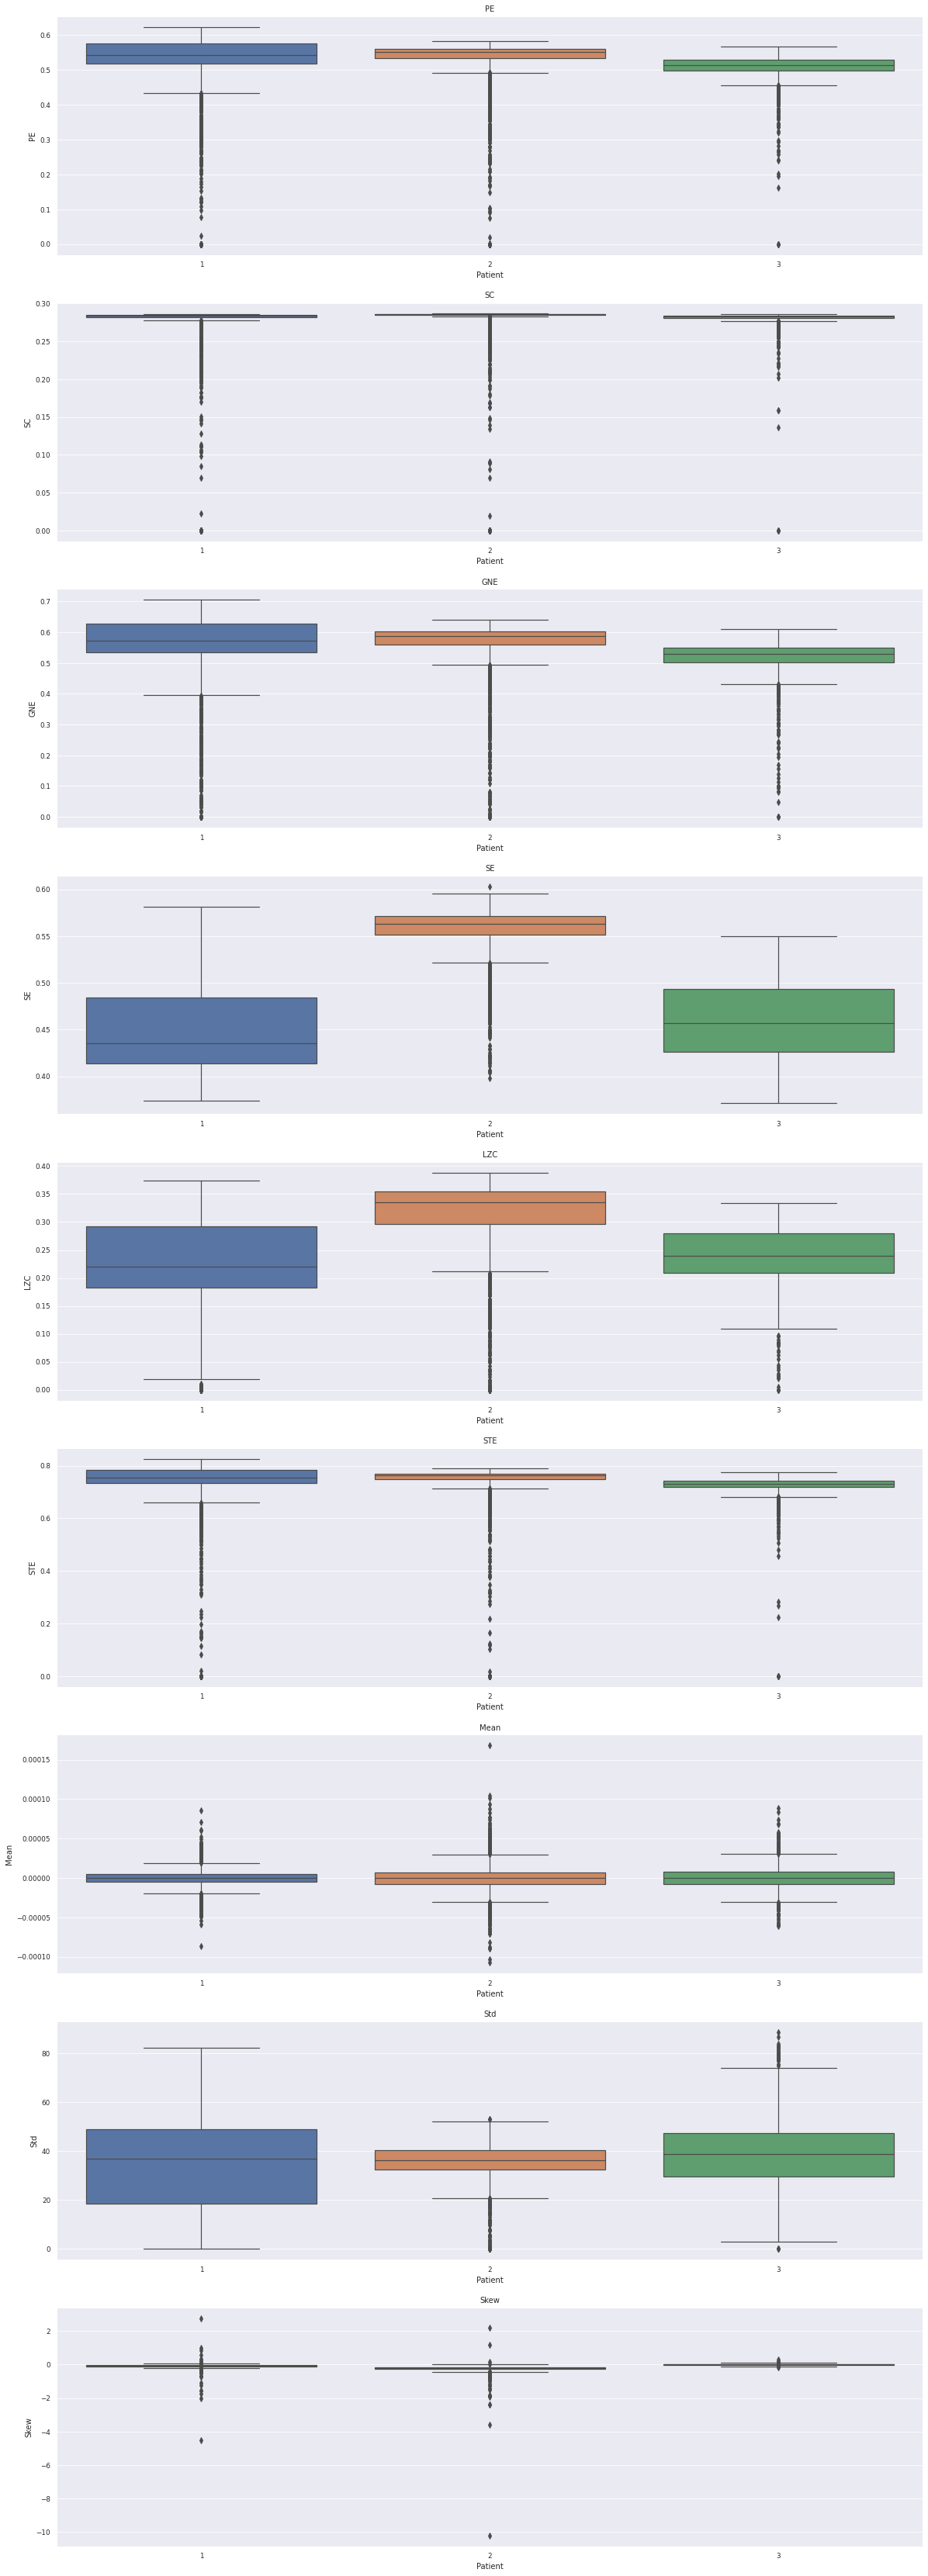

In [ ]:
etiquetados["State"]=etiquetados["State"].astype(int)
etiquetados["Patient"]=etiquetados["Patient"].astype(int)
no_etiquetados["Patient"]=no_etiquetados["Patient"].astype(int)

metricas = no_etiquetados.drop(axis=1, labels=['Patient']).columns

fig, axes = plt.subplots(len(metricas), figsize=(20,60))

for i,column in enumerate(metricas):
    sns.boxplot(ax=axes[i], data=no_etiquetados, y=column, x="Patient")
    axes[i].set_title(column)

for ax in axes:
    ax.tick_params(axis='y')

In [ ]:
# Examinamos con mayor detalle los % de datos de cada variable
# correspondientes a OUTLIERS-.
def get_out(ps_val, tot_vals):
    # IQR -InterQuartilRange-
    iqr = abs(ps_val.quantile(0.25, interpolation='nearest')-
              ps_val.quantile(0.75, interpolation='nearest'))
    llp = ps_val.quantile(0.25) - (1.5*iqr) # lower_limit_point-.
    ulp = ps_val.quantile(0.75) + (1.5*iqr) # upper_limit_point-.
    # check if there is/are outlier/s-.
    if ps_val.min() > llp and ps_val.max() < ulp:
        por_out= 0.0
    else:
        ps_val_col= ps_val[(ps_val < llp) | (ps_val > ulp)]
        por_out= np.shape(ps_val_col)[0]*100/tot_vals
        return por_out
df= no_etiquetados.drop(['Patient','SE'], axis=1)  
for ps_name, ps_val in df.items():
    por_out = get_out(ps_val, np.shape(df)[0])
    print('Variable {0:<20} {1:<20} {2:>5.2f}{3:>2}'.format(ps_name, 'OUTLIERS', por_out, '%'))
# val = ps_val.apply(get_out, convert_dtype=False)

Variable PE                   OUTLIERS              7.50 %
Variable SC                   OUTLIERS              9.22 %
Variable GNE                  OUTLIERS              7.42 %
Variable LZC                  OUTLIERS              2.53 %
Variable STE                  OUTLIERS              7.45 %
Variable Mean                 OUTLIERS              8.55 %
Variable Std                  OUTLIERS              4.48 %
Variable Skew                 OUTLIERS              1.63 %


Como se observa:
* A excepción de las métricas SE y LZC las medias entre mismas variables para los dos estados toman valores aproximados (tal como se observa principalmente en las variables con distribuciones que se aproximan a la normal).
* Los intervalos que definen los rangos intercuartílicos son aproximados entre variables de una misma variable.
* Todas las variables presentan outliers. El paciente que presenta la mayor cantidad de outliers es el paciente 2.
* A continuación se presentan los porcenatjes del total de valores de cada variable (sin discriminar paciente):


    Variable PE                   OUTLIERS              7.50 %
    Variable SC                   OUTLIERS              9.22 %
    Variable GNE                  OUTLIERS              7.42 %
    Variable LZC                  OUTLIERS              2.53 %
    Variable STE                  OUTLIERS              7.45 %
    Variable Mean                 OUTLIERS              8.55 %
    Variable Std                  OUTLIERS              4.48 %
    Variable Skew                 OUTLIERS              1.63 %

#### Conclusiones

* Sobre los datos etiquetados:
    Debido al gran desbalanceo que existe en las etiquetas, no podemos a priori distinguir métricas que permitan observar una separación entre distintos estados. Sin embargo, si podemos ver en las distribuciones de probabilidad para cada estado normalizadas que en las métricas GNE, SE Y LZC ambos estados tienen distribuciones bien distintas. En las demas se observan distribuciones similares con algunas diferencias que no son tan apreciables (por ejemplo en la variable STD ambos estados poseen una distribucion normal pero con valores medios ligeramente distintos). Tambien se logro identificar correlaciones entre variables, aproximadamente estimando como se relacionan ambas, lo que nos será util a la hora de aplicar metodos de aprendizaje supervisado. 
 
* Sobre los no etiquetados:
    Se observo que los datos no etiquetados no poseen distribuciones de probabilidad disntintas en las métricas con respecto a los etiquetados, ni tampoco diferencias apreciables en las correlaciones entre variables ni en como se comportan unas con respecto a otras. Debido a que se observan muchas diferencias en las distribuciones de cada paciente y estos datos estan diferenciados por paciente, pensamos que no habría mayores problemas en analizarlos junto con los no etiquetados (ya que no se observan diferencias apreciables en las tendencias de ambos conjuntos de datos) pero no poseer etiqueta hace que no sea conveniente utilizar ambos conjuntos de datos indistintamente, ya que lo que nos interesa es poder predecirla. Estariamos trabajando con datos con información incompleta si tratamos a ambos conjuntos por igual. 